## Lending Club - Lending Risk Analysis

1. Problem statement: You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
    

2. Objective - the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


3. Data info - It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

In [7]:
# Importing all required libraries/modules

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Set the session options

%matplotlib inline
pd.options.display.max_columns = None

# set warnings to ignore options
warnings.filterwarnings("ignore")


In [1218]:
# import data using low memory flag to load columns with multiple data types.
df = pd.read_csv("loan.csv",low_memory=False)

In [1219]:
# printing top 3 rows of data
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [1211]:
df.shape

(39717, 111)

## Data Cleaning process

Following are the steps how the data will be cleaned.
1. Removing all columns which have no Data.
2. Removing all rows which have no Data.
3. Removing columns which have single unique values
4. Checking for null values and their percentages with respect to total records.
5. Removing columns with more than 30% null or NaN records
6. Checking the funded amount should not be greater than applied loan amount.

In [33]:
len(df.index)

39717

In [1220]:
# Drop columns and Rows that have no Data.
loan_data=df.dropna(axis='columns',how='all')
loan_data=loan_data.dropna(axis='rows',how='all')

#Drop columns that have same/single unique values
loan_unique=loan_data.nunique().sort_values()
unique_cols=loan_unique[loan_unique==1].index
loan_data.drop(columns=unique_cols,axis=1,inplace=True)

# Cheking the shape of data
loan_data.shape

(39717, 48)

In [1221]:
# Checking columns with null values percentage and extracting columns more than 30%

null_percentage = round(100*loan_data.isnull().sum()/len(loan_data.index),2)
null_percentage[null_percentage>30]

desc                     32.58
mths_since_last_delinq   64.66
mths_since_last_record   92.99
next_pymnt_d             97.13
dtype: float64

In [36]:
# Removing columns which has more than 30% null values in it.
loan_data.drop(columns=['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],inplace=True)

# Printing shape of data
loan_data.shape

(39717, 44)

In [37]:
# Lets describe the data
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


In [38]:
# Checking the Funded amount not greater than loan amount 
loan_data[loan_data['funded_amnt']>loan_data['loan_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


Observation:
- No record has been found where the Funded amount is greater than the Applied loan amount. This implies that the Lending Company has no record of fraudlent/scam transactions.

In [39]:
# Chcking the data types 
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [41]:
# Printing clean data
loan_data.shape

(39717, 44)

In [ ]:
## Data Cleaning Column wise

In [44]:
# 1. 'term' column
loan_data['term'].iloc[0] 

' 36 months'

In [50]:
# Lets remove the whitespace 
loan_data['term'] = loan_data['term'].str.strip(' ')

# Checking Unique values
loan_data['term'].value_counts()

36 months    29096
60 months    10621
Name: term, dtype: int64

Observations - 

- We see Loan term is either for 36 months ie. 3 years and 60 months ie. 5 years. Observation can be made that short term loans are higher than long terms


In [104]:
# 2. 'int_rate' and 'revol_util' column
print(loan_data['int_rate'].iloc[0])
print(loan_data['revol_util'].iloc[0])

10.65
83.70%


In [106]:
# The column must be in float and '%' sign must be removed.
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype('float')
loan_data['revol_util'] = loan_data['revol_util'].str.strip('%').astype('float')

In [58]:
# 3. 'home_ownership' column
loan_data['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Observations- 
- We know home_ownership can be 'Rent', 'Mortgage', 'Own' or 'Other'. 'None' cannot be such option/value. Hence we can remove/ignore those values

In [651]:
loan_data = loan_data[loan_data['home_ownership']!='NONE']
loan_data['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

In [65]:
# 4. 'emp_length' and 'emp_title' column
loan_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4581
2 years      4388
3 years      4095
4 years      3436
5 years      3281
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [88]:
# We need to remove the 'years' and fill Nan values to 'Not Disclosed'

loan_data['emp_length']=loan_data['emp_length'].str.strip().str.replace(' years','').str.replace('+','').str.replace('< 1','0').str.replace(' year','')

loan_data['emp_length'].fillna(value='Not Disclosed',inplace=True)
loan_data['emp_title'].fillna(value='Not Disclosed',inplace=True)

loan_data['emp_length'].value_counts()

10               8879
0                4581
2                4388
3                4095
4                3436
5                3281
1                3240
6                2229
7                1773
8                1479
9                1258
Not Disclosed    1075
Name: emp_length, dtype: int64

In [90]:
# 5. 'verification_status' column
loan_data['verification_status'].value_counts()

Not Verified       16918
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [101]:
# we see that the values are 'Not verified', 'Verified' and 'Source Verified'.
# From this, columns can be derived - 'Source Income Verified' and 'Income Verified'

loan_data['income_verified'] = loan_data['verification_status'].apply(lambda x: 'Verified' if x=='Verified' or x=='Source Verified' else 'Not Verified')
loan_data['source_income_verified'] = loan_data['verification_status'].apply(lambda x: 'Verified' if x=='Source Verified' else 'Not Verified')


# We need to make sure that derived columns have two values.
print("Income_Verified=")
print(loan_data['income_verified'].value_counts())
print("\t")
print("Source_Income_Verified=")
print(loan_data['source_income_verified'].value_counts())

Income_Verified=
Verified        22796
Not Verified    16918
Name: income_verified, dtype: int64
	
Source_Income_Verified=
Not Verified    29727
Verified         9987
Name: source_income_verified, dtype: int64


In [103]:
## We making sure that 'Verified' or 'Source Verified' must account for same result.

loan_data[(loan_data['verification_status']=='Verified') | (loan_data['verification_status']=='Source Verified') ].shape

(22796, 50)

In [82]:
# 6. 'issue_d' and 'earliest_cr_line' column

# we see that the columns need to be datetime column and derived columns can be extracted from them.

loan_data ['issue_d'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data ['issue_date_year'] = loan_data ['issue_d'].dt.year
loan_data ['issue_date_month'] = loan_data ['issue_d'].dt.strftime('%b')


loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line'].dt.year
loan_data['earliest_cr_line_month'] = loan_data['earliest_cr_line'].dt.strftime('%b')

In [85]:
# 7. loan_status column

loan_data['loan_status'].value_counts()

Fully Paid     32947
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [107]:
# 8. loan_data['purpose']

loan_data['purpose'].value_counts()

debt_consolidation    18640
credit_card            5130
other                  3991
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Observations:

- We see 'home_improvement','house' are related to household field.
- We see most of the loans that have been visible are for debt_consolidation. 

In [ ]:
# 9. loan grade column

In [185]:
print((loan_data['grade'].value_counts()))

B    12018
A    10084
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


In [193]:
# lets group by grade and sub_grade with respect to interest_rate
loan_data.groupby(['grade','sub_grade']).median()['int_rate']

grade  sub_grade
A      A1           5.42
       A2           5.99
       A3           7.14
       A4           7.51
       A5           8.49
B      B1           9.91
       B2          10.59
       B3          10.99
       B4          11.49
       B5          11.99
C      C1          12.99
       C2          13.49
       C3          13.57
       C4          13.92
       C5          14.26
D      D1          14.61
       D2          15.21
       D3          15.58
       D4          15.95
       D5          16.32
E      E1          16.45
       E2          16.82
       E3          17.19
       E4          17.56
       E5          17.93
F      F1          18.30
       F2          18.67
       F3          20.99
       F4          19.41
       F5          19.79
G      G1          20.16
       G2          20.48
       G3          20.90
       G4          21.27
       G5          21.59
Name: int_rate, dtype: float64

Observations:
- Each loan is been mapped to grade [A,B,C,D,E,F,G]. Each grade determines the risk factor ie. Low [A] to High [G].
- Most loans are of A,B,C grade.
- When compared to interest rate, the higher the grad/sub_grade the higher the interest_rate. This states that 'grade','sub_grade' and 'int_rate' are highly coorelated.


In [695]:
# 10 pub_rec_bankruptcies
loan_data['pub_rec_bankruptcies'].isnull().sum()

694

In [696]:
# We need to remove null values
loan_data = loan_data[~loan_data['pub_rec_bankruptcies'].isnull()]
loan_data.shape

(39020, 50)

In [406]:
## printing out columns for visiblity
cols = loan_data.columns 
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_date_year', 'issue_date_month',
       'earliest_cr_line_year', 'earliest_cr_line_month', 'income_verified',
       'source_income_verified'],
      dtype='object')

In [699]:
## Working with loan_status = Fully Paid or Charged Off.
## This will provide concrete records that are completed in a way, 
## since Current records are in progress that can make difference in analysis

loan_df = loan_data[(loan_data['loan_status']=='Fully Paid') | (loan_data['loan_status']=='Charged Off')]
loan_df.shape

(37880, 50)

In [834]:
# just to understand the loan_status percentage.

print("Count for each loan status:")
print(loan_df['loan_status'].value_counts()," \n")

percentage_paid = round(100*(loan_df[(loan_df['loan_status']=='Fully Paid')].shape[0]/loan_df.shape[0]),2)
percentage_off = round(100*(loan_df[(loan_df['loan_status']=='Charged Off')].shape[0]/loan_df.shape[0]),2)
print("Precentage for Fully Paid=" ,percentage_paid,"%")
print("Precentage for Charged off= ",percentage_off,"%")

Count for each loan status:
Fully Paid     32371
Charged Off     5509
Name: loan_status, dtype: int64  

Precentage for Fully Paid= 85.46 %
Precentage for Charged off=  14.54 %


# Univariate Analysis 

## verification_status	
- Indicates if income was verified by LC, not verified, or if the income source was verified


In [700]:
# understanding each category counts
print(loan_df['verification_status'].value_counts())

Not Verified       15998
Verified           12205
Source Verified     9677
Name: verification_status, dtype: int64


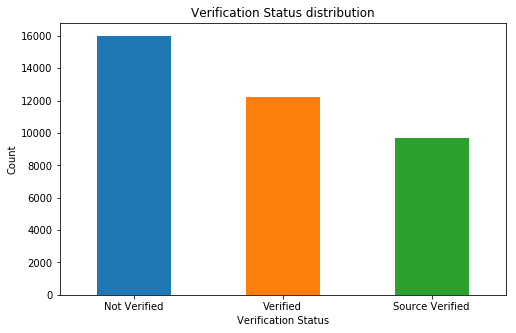

In [701]:
# plotting the bar chart 

plt.figure(figsize=(8,5))
loan_df['verification_status'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Verification Status distribution')
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.show()

Observations:

- We see that most of the loans provided, the Lending Club has Not Verified the income source or income itself.
- This is major risk sign, as borrowers can 'Default'/'Charged Off' on loan without any income verification. Clearly a Red Flag.

## addr_state

- Different states of US

In [943]:
# understanding count per states
loan_df['addr_state'].value_counts().head()

CA    6866
NY    3611
FL    2729
TX    2613
NJ    1757
Name: addr_state, dtype: int64

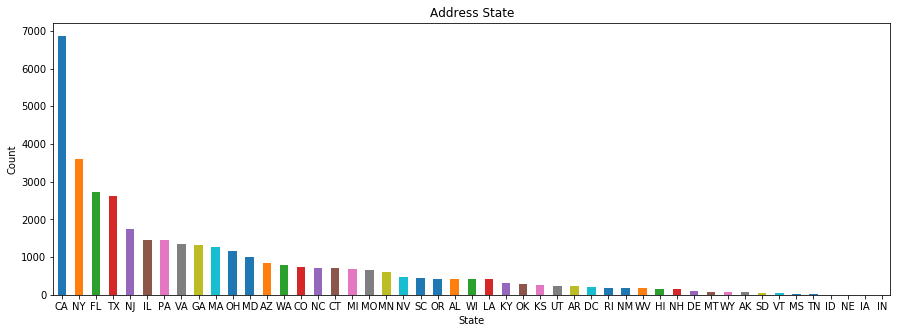

In [942]:
# plotting the bar chart 

plt.figure(figsize=(15,5))
loan_df['addr_state'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Address State')
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

Observation:

- We see that most loan borrowers are from CA, NY , FL and TX ie.(Calfornia, New York, Florida and Texas)

## Loan Amount

- The listed amount of the loan applied for by the borrower.


In [702]:
# Understanding stats

loan_df['loan_amnt'].describe()

count   37,880.00
mean    11,067.09
std      7,364.01
min        500.00
25%      5,375.00
50%      9,637.50
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

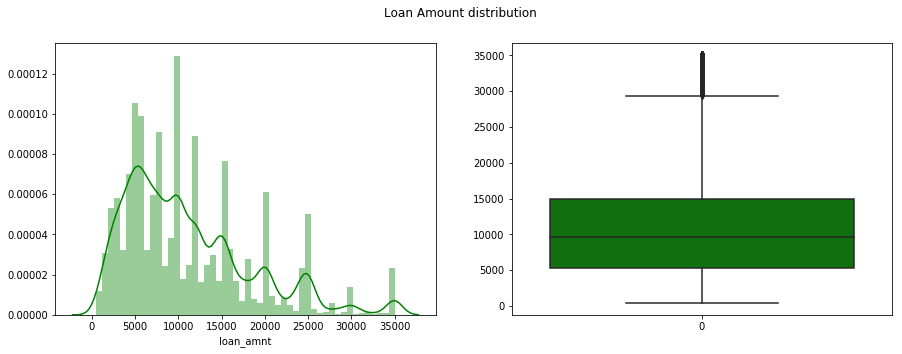

In [703]:
# We will use distplot and boxplot to understand the distribution

#Setting the figure size of plot
plt.figure(figsize=(15,5))

# 1st subplot
plt.subplot(1,2,1)
sns.distplot(a=loan_df['loan_amnt'],color='Green')

# 2nd subplot
plt.subplot(1,2,2)
sns.boxplot(data=loan_df['loan_amnt'],color='Green')

plt.suptitle('Loan Amount distribution')
plt.show()

Observations:
- We see that the spread or most applied loan amount stands between 5000 to 15000.
- There are some records where the loan amount is greater than 30000. 
- Since they look like outliers on boxplot, but they cannot be treated as outliers as the loan amount can be ideally be more.

In [704]:
## Checking what was the purpose for loan amount>30000 & loan amount<30000 and their annual income

print("Top 3 Purposes for Loan_amt < 30000")
print(loan_df[loan_df['loan_amnt'] < 30000]['purpose'].value_counts().head(3))
print('\t')
print("Top 3 Purposes for Loan_amt > 30000")
print(loan_df[loan_df['loan_amnt'] > 30000]['purpose'].value_counts().head(3))

Top 3 Purposes for Loan_amt < 30000
debt_consolidation    17139
credit_card            4821
other                  3705
Name: purpose, dtype: int64
	
Top 3 Purposes for Loan_amt > 30000
debt_consolidation    420
home_improvement       88
small_business         76
Name: purpose, dtype: int64


In [705]:
## Just to check annual income of those who have applied loan > 30000.
## Ideally it should be more than median annual_income for applied loan > 30000.

loan_df[loan_df['loan_amnt'] > 30000]['annual_inc'].describe()

count       735.00
mean    127,622.26
std      76,094.66
min      43,200.00
25%      82,000.00
50%     105,000.00
75%     146,000.00
max     750,000.00
Name: annual_inc, dtype: float64

Observations:

- We see most of the customers applied for loan amount ranging between 5000 to 15000. Top 3 purposes for them are, 'debt_consolidation','credit_card', 'other'    
- There are customers who applied for loan amount > 30000, but their count is less. Their top 3 purposes for them are, 'debt_consolidation','home_improvement', 'small_business'    
- The customers who have applied for loan amount > 30000, on median have 105000.0 as annual income, suggesting positive outlook on repayment of loan. Thus annual income play important role while applying for loan.

## Funded Amount

- The total amount committed to that loan at that point in time.

In [706]:
# understanding stats
loan_df['funded_amnt'].describe()

count   37,880.00
mean    10,801.62
std      7,103.05
min        500.00
25%      5,200.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: funded_amnt, dtype: float64

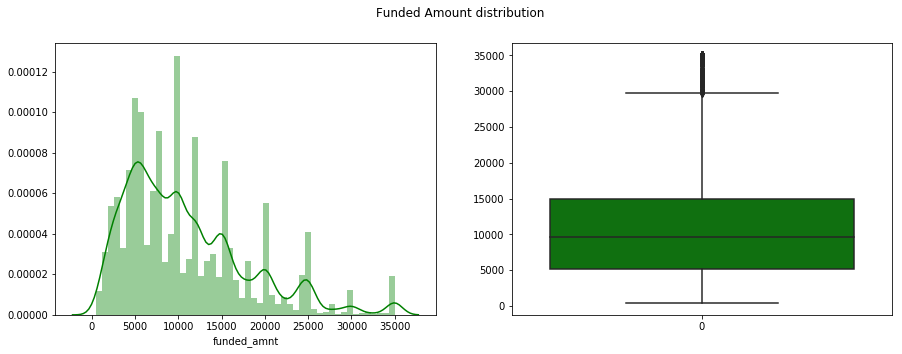

In [707]:
# We will use distplot and boxplot to understand the distribution

#Setting the figure size of plot
plt.figure(figsize=(15,5))

# 1 subplot
plt.subplot(1,2,1)
sns.distplot(a=loan_df['funded_amnt'],color='Green')

# 2 subplot
plt.subplot(1,2,2)
sns.boxplot(data=loan_df['funded_amnt'],color='Green')


plt.suptitle('Funded Amount distribution')
plt.show()

Observations:
- We can see that it resembles the same graph as 'loan_amnt'.
- It states that the customers/borrowers who applied for loan mostly got approved from the Lending Club.

## Interest rate

- Interest Rate on the loan


In [708]:
# understanding stats
loan_df['int_rate'].describe()

count   37,880.00
mean        11.96
std          3.71
min          5.42
25%          8.94
50%         11.83
75%         14.46
max         24.40
Name: int_rate, dtype: float64

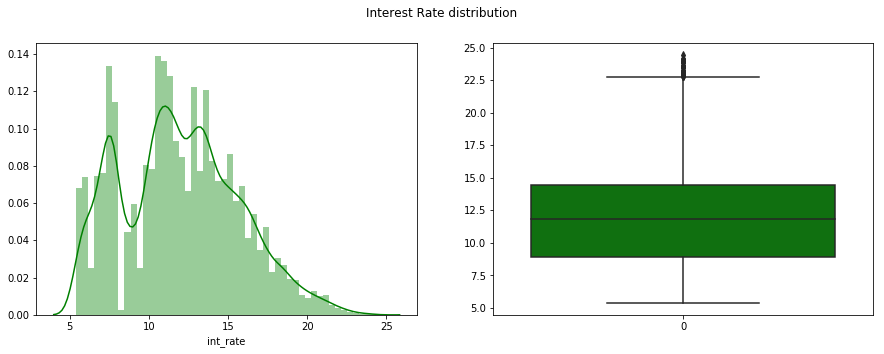

In [709]:
# We will use distplot and boxplot to understand the distribution

#Setting the figure size of plot
plt.figure(figsize=(15,5))

# 1 subplot
plt.subplot(1,2,1)
sns.distplot(a=loan_df['int_rate'],color='Green')

# 2 subplot
plt.subplot(1,2,2)
sns.boxplot(data=loan_df['int_rate'],color='Green')

plt.suptitle('Interest Rate distribution')
plt.show()

Observations

- Most of the interest rates do fall 9% to 14%. 
- There are records which lie beyond interest rate of 22%, which could be of higher risk grade.

## Home Ownership

- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [710]:
loan_df['home_ownership'].value_counts()

RENT        18100
MORTGAGE    16769
OWN          2913
OTHER          98
Name: home_ownership, dtype: int64

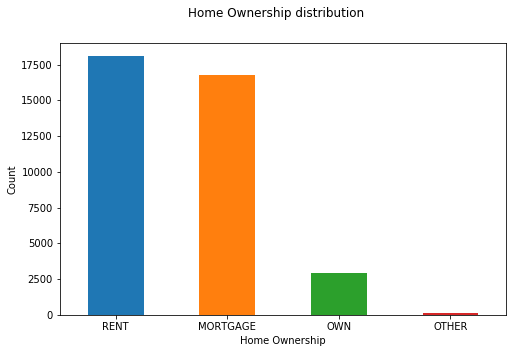

In [711]:
# We will use bar chart to analyse data 

#Setting the figure size of plot
plt.figure(figsize=(8,5))

loan_df['home_ownership'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.suptitle('Home Ownership distribution')
plt.show()

Observations:
- Most borrowers from Lending Club for loans have Home-Ownership : RENT, MORTGAGE, OWN and OTHER

## Employment Length 

- Employment length in years

In [712]:
# Understanding the counts for each category
loan_df['emp_length'].value_counts()

10               8369
0                4341
2                4207
3                3951
4                3297
5                3161
1                3077
6                2136
7                1689
8                1410
9                1209
Not Disclosed    1033
Name: emp_length, dtype: int64

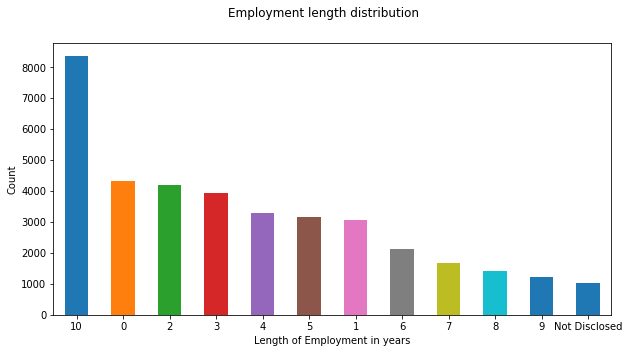

In [713]:
# We will use bar chart to analyse count

#Setting the figure size of plot
plt.figure(figsize=(10,5))


loan_df['emp_length'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Length of Employment in years")
plt.ylabel("Count")
plt.suptitle('Employment length distribution')
plt.show()

Observation:
- Most borrowers who borrowed loan have employment years of 10 and more.
- This tells us that either:
    - the borrowers have stable income ie. having higher employment length
    - the borrowers trying buy things as soon as they started working/ got employed ie. less than 0 years/1 year of employment   length.

# DTI = debt-to-income
- The debt-to-income (DTI) ratio measures the amount of income a person or organization generates in order to service a debt.
- A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- A low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.

In [714]:
# understanding stats
loan_df['dti'].describe()

count   37,880.00
mean        13.32
std          6.66
min          0.00
25%          8.19
50%         13.41
75%         18.59
max         29.99
Name: dti, dtype: float64

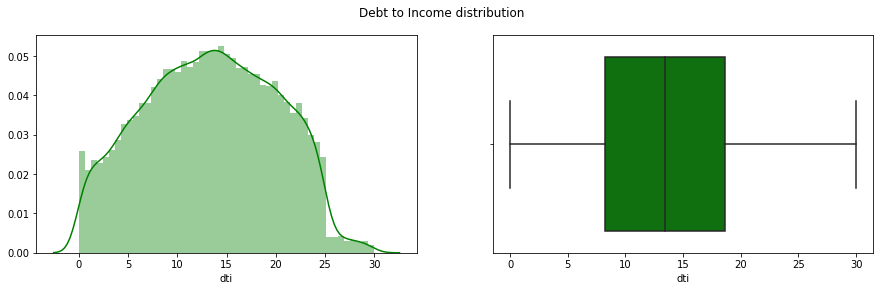

In [944]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(loan_df['dti'],color='green')
plt.subplot(1,2,2)
sns.boxplot(loan_df['dti'],color='green')
plt.suptitle('Debt to Income distribution')
plt.show()

Observations:

- We see that DTI spread lies between 7 and 19.
- We see that ratio values are most under 30. This is a very strong indication for Lending club since they have provided loans to customers who have DTI ratio below 30.
- The preference for low DTI ratios makes sense since lenders want to be sure a borrower isn't overextended meaning they have too many debt payments relative to their income, thus more chances of getting loan 'Charged Off'


# pub rec =  Number of public derogatory records

Derogatory information is any reported negative credit information which can be used to deny an individual a loan. 

In [716]:
# understanding counts for each category

loan_df['pub_rec'].value_counts()

0    35830
1     1994
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [717]:
# getting total_counts 
total_c = loan_df['pub_rec'].value_counts().sum()
total_c

37880

In [718]:
# Checking percentage of each category to analyse it more

# For no, one, two, three , four derogatory record
zero_rec = round(100*(loan_df['pub_rec'].value_counts()[0]/total_c),2)
one_rec = round(100*(loan_df['pub_rec'].value_counts()[1]/total_c),2)
two_rec = round(100*(loan_df['pub_rec'].value_counts()[2]/total_c),2)
three_rec = round(100*(loan_df['pub_rec'].value_counts()[3]/total_c),2)
four_rec = round(100*(loan_df['pub_rec'].value_counts()[4]/total_c),2)

print("no derogatory record percentage = ",zero_rec,"\t")
print("one derogatory record percentage = ",one_rec,"\t")
print("two derogatory record percentage = ",two_rec,"\t")
print("three derogatory record percentage = ",three_rec,"\t")
print("four derogatory record percentage = ",four_rec,"\t")

no derogatory record percentage =  94.59 	
one derogatory record percentage =  5.26 	
two derogatory record percentage =  0.12 	
three derogatory record percentage =  0.02 	
four derogatory record percentage =  0.01 	


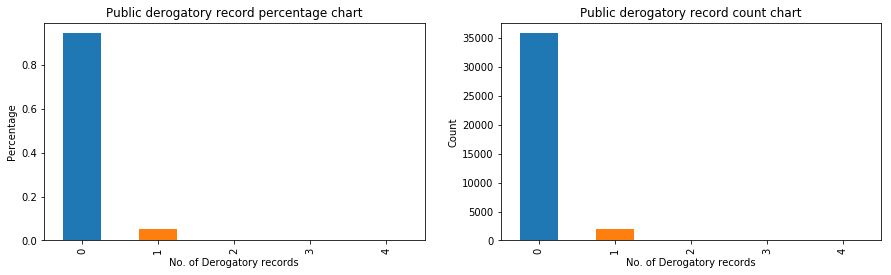

In [719]:
# lets make it percentage and count wise using bar plot

plt.figure(figsize=(15,4))

# 1 subplot
plt.subplot(1,2,1)
# using normalize method = returns the relative frequency by dividing all values by the sum of values
loan_df['pub_rec'].value_counts(normalize=True).plot.bar()
plt.title("Public derogatory record percentage chart")
plt.xlabel("No. of Derogatory records")
plt.ylabel("Percentage")

# 2 subplot
plt.subplot(1,2,2)
loan_df['pub_rec'].value_counts().plot.bar()
plt.title("Public derogatory record count chart")
plt.xlabel("No. of Derogatory records")
plt.ylabel("Count")
plt.show()

Observations:

- We see that more than 90% borrowers indicate that they have no public derogatory records.
- This states that the Lending club is providing loan to good borrowers with scrutiny background checks so as to deny/accept loan.

# pub_rec_bankruptcies

- Number of bankcrupties made


In [721]:
# understanding counts for each category

loan_df['pub_rec_bankruptcies'].value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [722]:
# getting total_counts 
total_c = loan_df['pub_rec_bankruptcies'].value_counts().sum()
total_c

37880

In [724]:
print("Counts of each bankcrupt :")
print(loan_data['pub_rec'].value_counts(),"\n")

# Checking percentage of each field

# For no, one, two, three , four derogatory record
zero_rec = round(100*(loan_data['pub_rec'].value_counts()[0]/total_c),2)
one_rec = round(100*(loan_data['pub_rec'].value_counts()[1]/total_c),2)
two_rec = round(100*(loan_data['pub_rec'].value_counts()[2]/total_c),2)

print("no bankcrupt record percentage --> ",zero_rec,"\t")
print("one bankcrupt record percentage --> ",one_rec,"\t")
print("two bankcrupt record percentage --> ",two_rec,"\t")


Counts of each bankcrupt :
0    36924
1     2037
2       50
3        7
4        2
Name: pub_rec, dtype: int64 

no bankcrupt record percentage -->  97.48 	
one bankcrupt record percentage -->  5.38 	
two bankcrupt record percentage -->  0.13 	


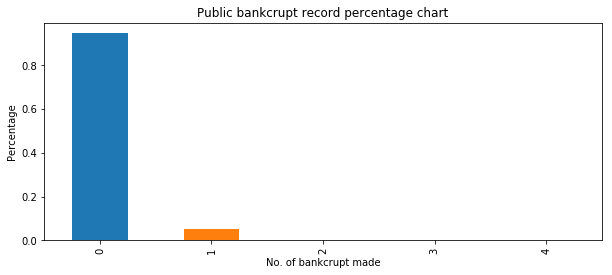

In [313]:
# lets make it percentage wise chart

#Setting the figure size of plot
plt.figure(figsize=(10,4))

# using normalize method = returns the relative frequency by dividing all values by the sum of values
loan_data['pub_rec'].value_counts(normalize=True).plot.bar()
plt.title("Public bankcrupt record percentage chart")
plt.xlabel("No. of bankcrupt made")
plt.ylabel("Percentage")
plt.show()

Observations:

- We see that more than 95% borrowers indicate that they have zero bankcruptcy records.
- This says that the Lending club is providing loan to good customers with scrutiny background checks so as to deny/accept loan. Thus helping in deciding whether such borrowers can go 'Default'

# issue_d  = loan issue date

In [756]:
# Lets check the Year wise count of loans
loan_df['issue_date_year'].value_counts()

2011    20516
2010    11532
2009     4713
2008     1112
2007        7
Name: issue_date_year, dtype: int64

In [754]:
## Calculating YoY change
# Formula = 100 * ((Current year - Last year)/Last year)

for i in range(0,4):
    yoy = round(100*((loan_df['issue_date_year'].value_counts().tolist()[i]-loan_df['issue_date_year'].value_counts().tolist()[i+1]))/loan_df['issue_date_year'].value_counts().tolist()[i+1],2)
    print("YoY Change from",loan_df['issue_date_year'].value_counts().index[i+1]," to ",loan_df['issue_date_year'].value_counts().index[i]," -> ",yoy,"%")

YoY Change from 2010  to  2011  ->  77.9 %
YoY Change from 2009  to  2010  ->  144.68 %
YoY Change from 2008  to  2009  ->  323.83 %
YoY Change from 2007  to  2008  ->  15785.71 %


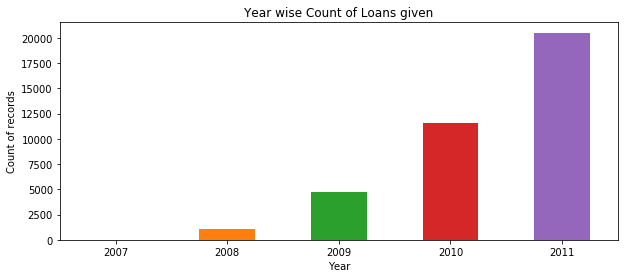

In [757]:
plt.figure(figsize=(10,4))
loan_df['issue_date_year'].value_counts().sort_values().plot.bar()
plt.xticks(rotation=0)
plt.title("Year wise Count of Loans given")
plt.xlabel("Year")
plt.ylabel("Count of records")
plt.show()

Observation:

- We see there is a strong upline trend based on Count of Loan per Year.
- We also calculated and checked the YoY% = 'Year on Year' growth and it has been growing on good pace with respect to Count of records. It shows a goos sign.

# installment

- The monthly payment owed by the borrower.

In [759]:
# undertsanding the stats

loan_df['installment'].describe()

count   37,880.00
mean       322.47
std        208.62
min         16.08
25%        165.82
50%        277.76
75%        425.55
max      1,305.19
Name: installment, dtype: float64

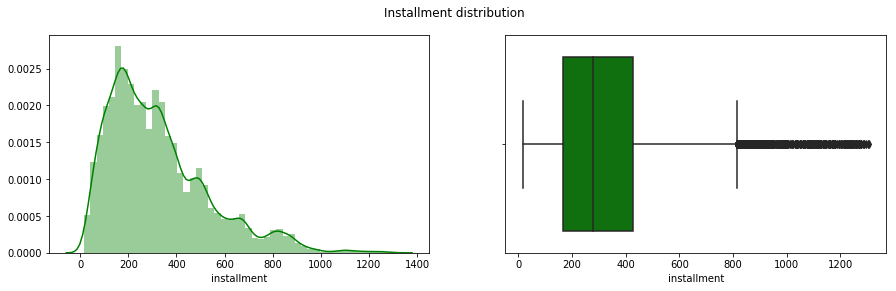

In [945]:
# We will use distplot and boxplot to understand the distribution

#Setting the figure size of plot
plt.figure(figsize=(15,4))

# 1st subplot
plt.subplot(1,2,1)
sns.distplot(loan_df['installment'],color='green')

# 2nd subplot
plt.subplot(1,2,2)
sns.boxplot(loan_df['installment'],color='green')

plt.suptitle('Installment distribution')
plt.show()

Observation-
- We see that most installment value lies between 190-410.
- There are some installments > 800. This could be due to higher loan amount with higher interest rate and lower term.

# Segmented Analysis

# Annual inc

In [764]:
# basic stats understanding
loan_df['annual_inc'].describe()

count      37,880.00
mean       68,763.87
std        63,573.79
min         4,000.00
25%        40,000.00
50%        59,000.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

Observations:

- We see that there is a big spread and plotting and understanding them would be difficult.
- To simplify, We analyse the data in two different sections
    - 1. Annual income > 82,000 ( > 75%)
    - 2. Annual income < 82,000 ( < 75%)

In [767]:
# 1. Annual income > 82,000 ( > 75%)

# Since the 75% lies around 82,000.00 and max is 6,000,000.00
# lets check the details for annual_inc > 82,000.00

loan_df_more_75 = loan_df[loan_df['annual_inc']>82000]
loan_df_more_75['annual_inc'].describe()

count       9,424.00
mean      126,672.96
std       104,378.44
min        82,008.00
25%        92,289.75
50%       106,410.50
75%       131,004.00
max     6,000,000.00
Name: annual_inc, dtype: float64

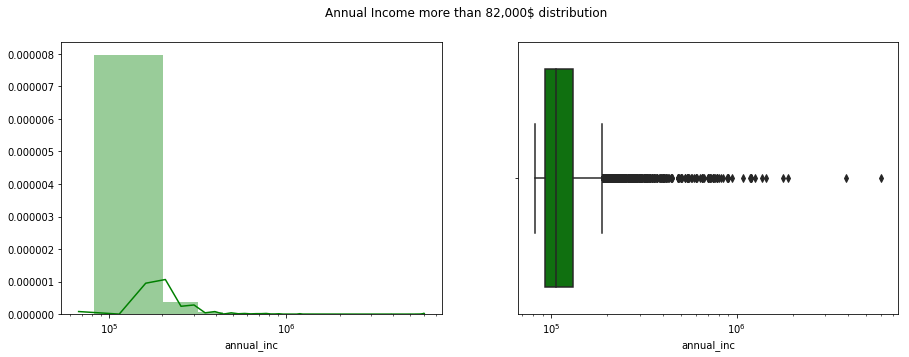

In [946]:
## understanding distribution for annual_inc> 82,000

plt.figure(figsize=(15,5))

# we need to use log scale; since the amount values are huge and wont be plotted correctly.
plt.subplot(1,2,2)
sns.boxplot(loan_df_more_75['annual_inc'],color='green')
plt.xscale('log')
plt.subplot(1,2,1)
sns.distplot(loan_df_more_75['annual_inc'],color='green')
plt.xscale('log')

plt.suptitle('Annual Income more than 82,000$ distribution')
plt.show()

Observations:
- We still see that there is huge spread present.

In [773]:
# 2. Annual income < 82,000 ( < 75%)

# lets check the details for annual_inc < 82,000.00

loan_df_less_75 = loan_df[loan_df['annual_inc']<=82000]
loan_df_less_75['annual_inc'].describe()

count   28,456.00
mean    49,585.66
std     17,141.80
min      4,000.00
25%     36,000.00
50%     50,000.00
75%     63,000.00
max     82,000.00
Name: annual_inc, dtype: float64

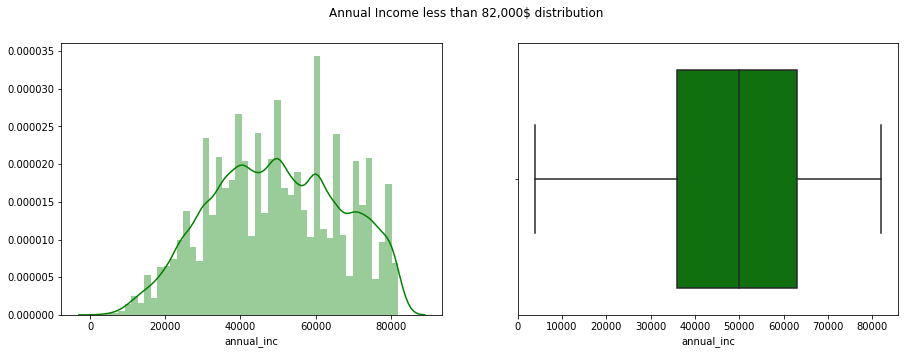

In [947]:
## understanding distribution for annual_inc < 82,000

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loan_df_less_75['annual_inc'],color='green')
plt.subplot(1,2,2)
sns.boxplot(x=loan_df_less_75['annual_inc'],color='green')

plt.suptitle('Annual Income less than 82,000$ distribution')
plt.show()

Observations:
- We see that the spread lies under 35,000 to 65,000 of annual income.
- Also now the graph and plot are quite understandable. For instance we will continue with annual income<82,000

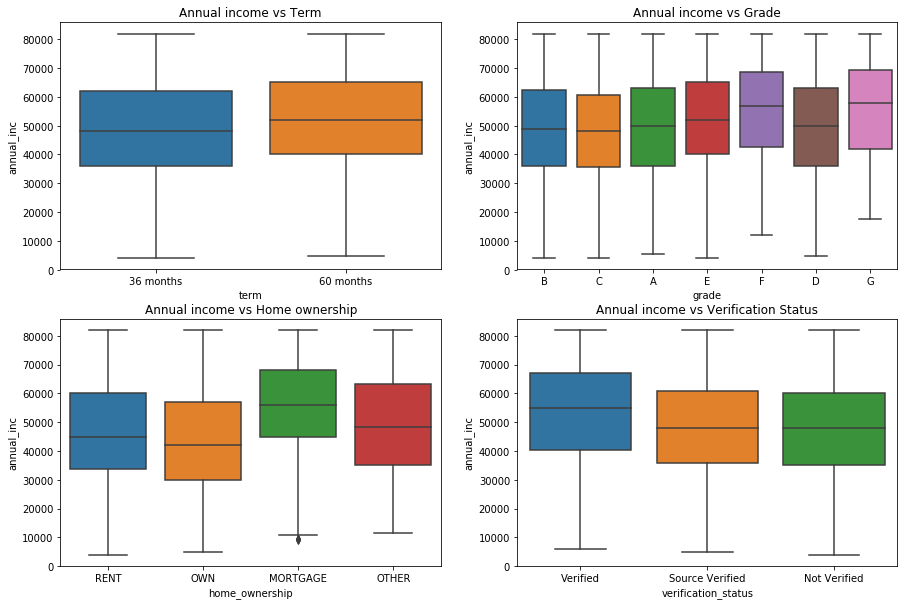

In [838]:
# We will use 'loan_df_less_75' as it will help to make plots better with good understanding

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=loan_df_less_75['term'],y = loan_df_less_75['annual_inc'])
plt.title("Annual income vs Term")

plt.subplot(2,2,2)
sns.boxplot(x=loan_df_less_75['grade'],y = loan_df_less_75['annual_inc'])
plt.title("Annual income vs Grade")

plt.subplot(2,2,3)
sns.boxplot(x=loan_df_less_75['home_ownership'],y = loan_df_less_75['annual_inc'])
plt.title("Annual income vs Home ownership")

plt.subplot(2,2,4)
sns.boxplot(x=loan_df_less_75['verification_status'],y = loan_df_less_75['annual_inc'])
plt.title("Annual income vs Verification Status")

plt.show()

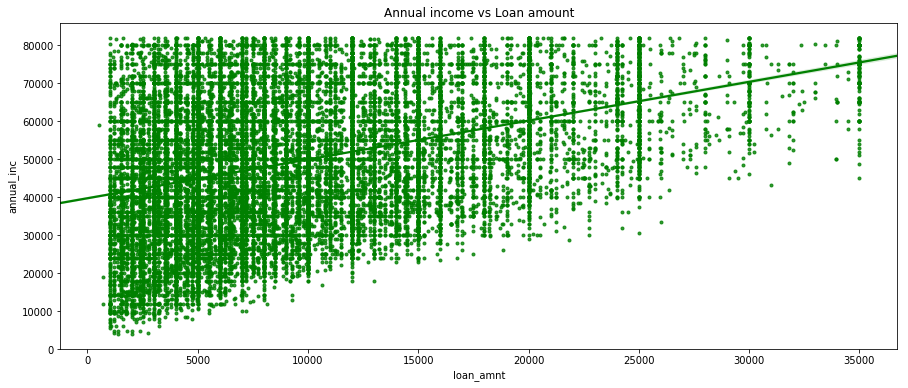

In [948]:
## lets plot chart where we can identify trend
plt.figure(figsize=(15,6))

# we use joint plot to understand better.
sns.regplot(x=loan_df_less_75['loan_amnt'],y = loan_df_less_75['annual_inc'],marker='.',color='green')
plt.title("Annual income vs Loan amount")
plt.show()

Observations:
- We see in the dataset where annual_income is less than 82,000, a strong trendline is present.
- This states that if the annual_income increases then the loan amount increases too.
- But in case where dataset(annual_income>82000), there is no trend ie. neutral 

## addr_state


In [970]:
# understanding counts for each addr_state

loan_df['addr_state'].value_counts().head(10)

CA    6866
NY    3611
FL    2729
TX    2613
NJ    1757
IL    1466
PA    1459
VA    1336
GA    1334
MA    1259
Name: addr_state, dtype: int64

In [971]:
# Given the values we will analyse for top 5 addr states

In [964]:
term_df = loan_df.groupby(['addr_state', 'term'], as_index=False)['id'].count()
term_df = term_df[(term_df['addr_state']== 'CA')|(term_df['addr_state']== 'NY')|(term_df['addr_state']== 'FL')|(term_df['addr_state']== 'TX')|(term_df['addr_state']== 'NJ')]
term_df.rename(columns={'id':'count'}, inplace=True)
term_df

,addr_state,term,count
8,CA,36 months,5279
9,CA,60 months,1587
18,FL,36 months,2067
19,FL,60 months,662
53,NJ,36 months,1304
54,NJ,60 months,453
59,NY,36 months,2766
60,NY,60 months,845
76,TX,36 months,2003
77,TX,60 months,610


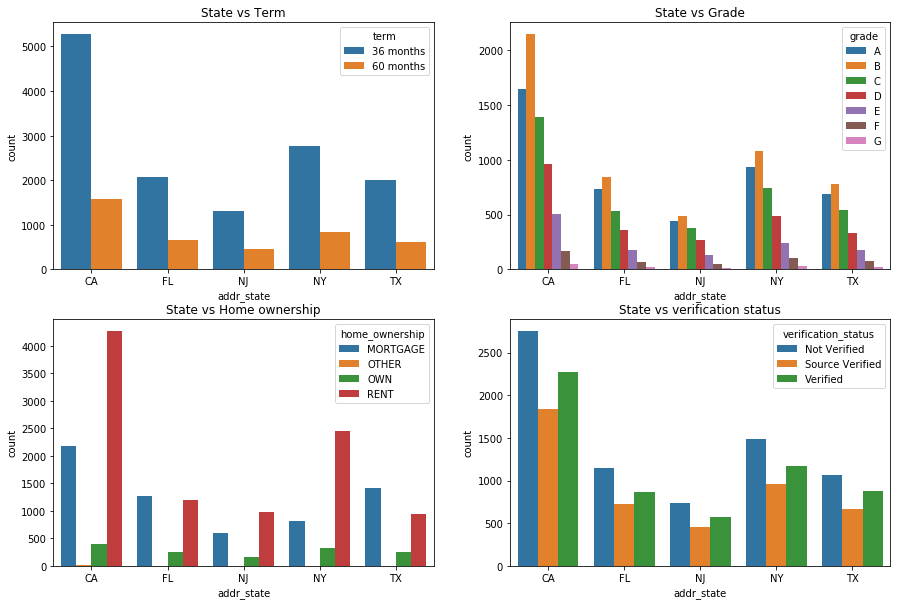

In [969]:
# We will check with term, grade, home_ownership, verification_status
plt.figure(figsize=(15,10))


term_df = loan_df.groupby(['addr_state', 'term'], as_index=False)['id'].count()
term_df = term_df[(term_df['addr_state']== 'CA')|(term_df['addr_state']== 'NY')|(term_df['addr_state']== 'FL')|(term_df['addr_state']== 'TX')|(term_df['addr_state']== 'NJ')]
term_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,1)
sns.barplot(x = term_df['addr_state'],y =term_df['count'],hue=term_df['term'])
plt.title("State vs Term")


grade_df = loan_df.groupby(['addr_state', 'grade'], as_index=False)['id'].count()
grade_df = grade_df[(grade_df['addr_state']== 'CA')|(grade_df['addr_state']== 'NY')|(grade_df['addr_state']== 'FL')|(grade_df['addr_state']== 'TX')|(grade_df['addr_state']== 'NJ')]
grade_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,2)
sns.barplot(x = grade_df['addr_state'],y =grade_df['count'],hue=grade_df['grade'])
plt.title("State vs Grade")


home_ownership_df = loan_df.groupby(['addr_state', 'home_ownership'], as_index=False)['id'].count()
home_ownership_df = home_ownership_df[(home_ownership_df['addr_state']== 'CA')|(home_ownership_df['addr_state']== 'NY')|(home_ownership_df['addr_state']== 'FL')|(home_ownership_df['addr_state']== 'TX')|(home_ownership_df['addr_state']== 'NJ')]
home_ownership_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,3)
sns.barplot(x = home_ownership_df['addr_state'],y =home_ownership_df['count'],hue=home_ownership_df['home_ownership'])
plt.title("State vs Home ownership")



verification_status_df = loan_df.groupby(['addr_state', 'verification_status'], as_index=False)['id'].count()
verification_status_df = verification_status_df[(verification_status_df['addr_state']== 'CA')|(verification_status_df['addr_state']== 'NY')|(verification_status_df['addr_state']== 'FL')|(verification_status_df['addr_state']== 'TX')|(verification_status_df['addr_state']== 'NJ')]
verification_status_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,4)
sns.barplot(x = verification_status_df['addr_state'],y =verification_status_df['count'],hue=verification_status_df['verification_status'])
plt.title("State vs verification status")

plt.show()

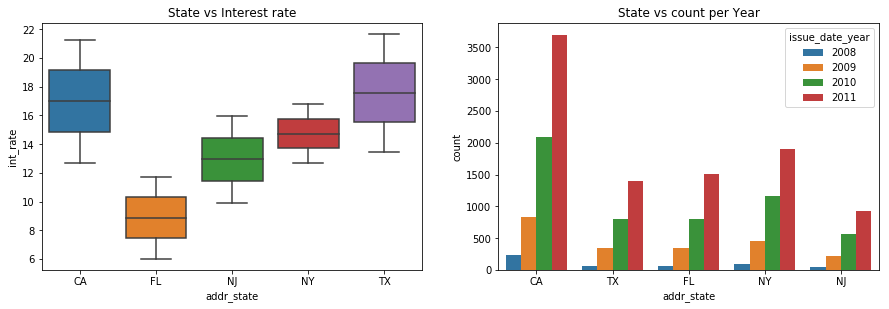

In [997]:
# extracting data for top 5 state values
top5_df = loan_df[(loan_df['addr_state']== 'CA')|(loan_df['addr_state']== 'NY')|(loan_df['addr_state']== 'FL')|(loan_df['addr_state']== 'TX')|(loan_df['addr_state']== 'NJ')]

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x = term_df['addr_state'],y=loan_df['int_rate'])
plt.title("State vs Interest rate")

plt.subplot(2,2,2)
sns.countplot(x = top5_df['addr_state'],hue=top5_df['issue_date_year'])
plt.title("State vs count per Year")

plt.show()

Observation:
- We see that for state= 'FL', the interest rate is very low when compared to other states. This needs to be checked with Loan_status.
- For every state, the count per year is increasing on good rate.

# Loan Amount

In [811]:
# understanding stats
loan_df['loan_amnt'].describe()

count   37,880.00
mean    11,067.09
std      7,364.01
min        500.00
25%      5,375.00
50%      9,637.50
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

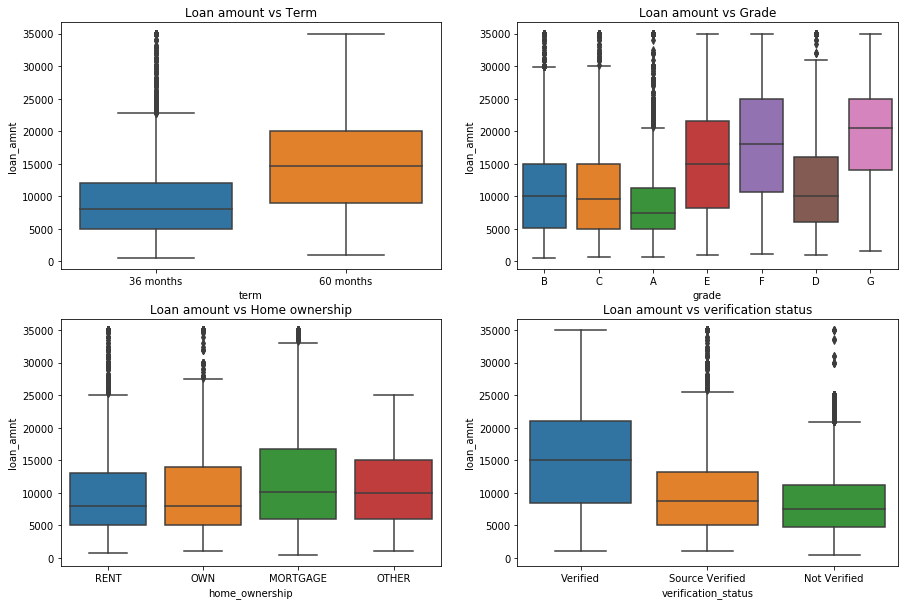

In [850]:
# lets check with term, grade, home_ownership, verification_status

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x=loan_df['term'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Term")

plt.subplot(2,2,2)
sns.boxplot(x=loan_df['grade'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Grade")

plt.subplot(2,2,3)
sns.boxplot(x=loan_df['home_ownership'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Home ownership")

plt.subplot(2,2,4)
sns.boxplot(x=loan_df['verification_status'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs verification status")

plt.show()

Observations - 
- We see higher loan amount is applied for 60 months. This tells that since loan amount is big, then timeline to repay will be more ie.60 months, when compared to 36 months.
- We see loan amount for Grades = A,B,C are somewhat less when compared to grades like E,F,G. This means the higher the loan amount, the higher the risk it would possess. 
- When loan amount is compared to homeownership, most high loan amount stands for MORTGAGE. This maybe majorily pointed towards home/houseload loan on bigger picture.
- When we compared loan amount to verification; most loans were given to verified or source verified borrowers. But if one sees the extreme ends and outliers, the loan amount given under 'Not verified' is evident. This can be risk to 'Charged Off' and financial losses to lending club as no verification is done but the loan amount is approved.

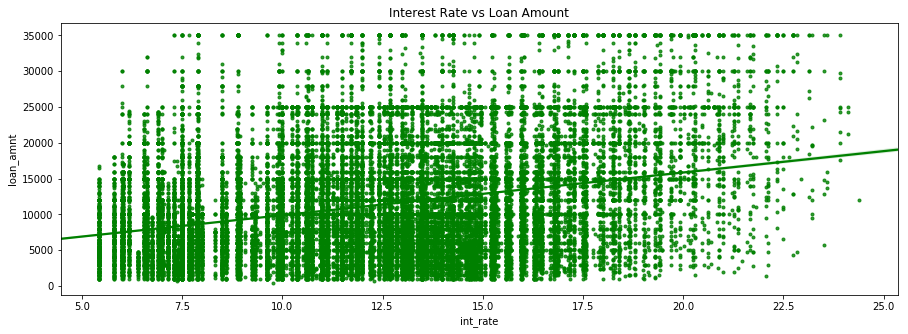

In [1175]:
# comapring loan amount and int_rate for any trends

plt.figure(figsize=(15,5))
sns.regplot(y=loan_df['loan_amnt'],x = loan_df['int_rate'],marker='.',color='green')
plt.title("Interest Rate vs Loan Amount")
plt.show()

Observations:

- We see that there is slight uptrend when interest rate rises,  loan amount also increases.

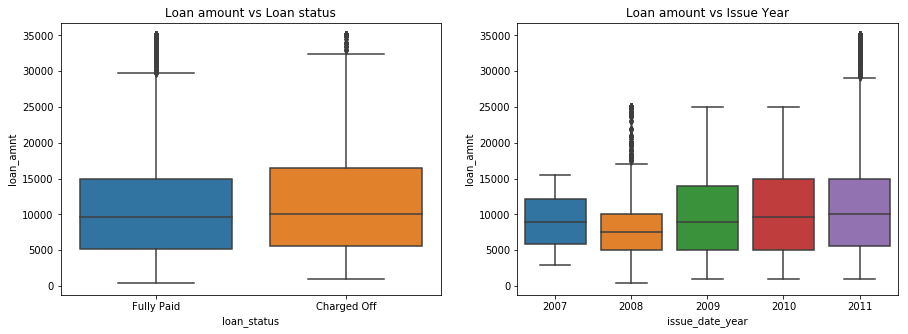

In [853]:
# lets check with loan_status,Issue_year

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x=loan_df['loan_status'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Loan status")

plt.subplot(1,2,2)
sns.boxplot(x=loan_df['issue_date_year'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Issue Year")

plt.show()


Observations - 
- We see that 'Charged Off' loan status have more loan amounts.
- We see that in year 2008, the loan amount has less spread. It may be due to 2008 economic crisis.

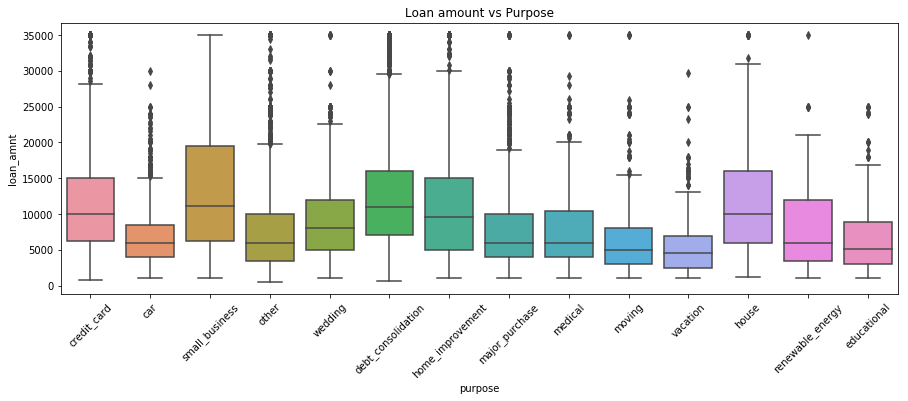

In [854]:
# lets check with purpose

plt.figure(figsize=(15,5))
sns.boxplot(x=loan_df['purpose'],y = loan_df['loan_amnt'])
plt.title("Loan amount vs Purpose")
plt.xticks(rotation=45)
plt.show()

Observations-
- We see that most loan amount is higher for small business then followed by debt_consolidation and house/home_improvement
- Since the term is either 36/60 months, most loans like for small business or debt_consolidation is more given by Lending Club.

# Interest rate

In [856]:
# understanding count of each category

loan_df['term'].value_counts()

36 months    28399
60 months     9481
Name: term, dtype: int64

In [857]:
# grouping the term on median of interest_rate

loan_df.groupby('term').median()['int_rate']

term
36 months   10.99
60 months   14.91
Name: int_rate, dtype: float64

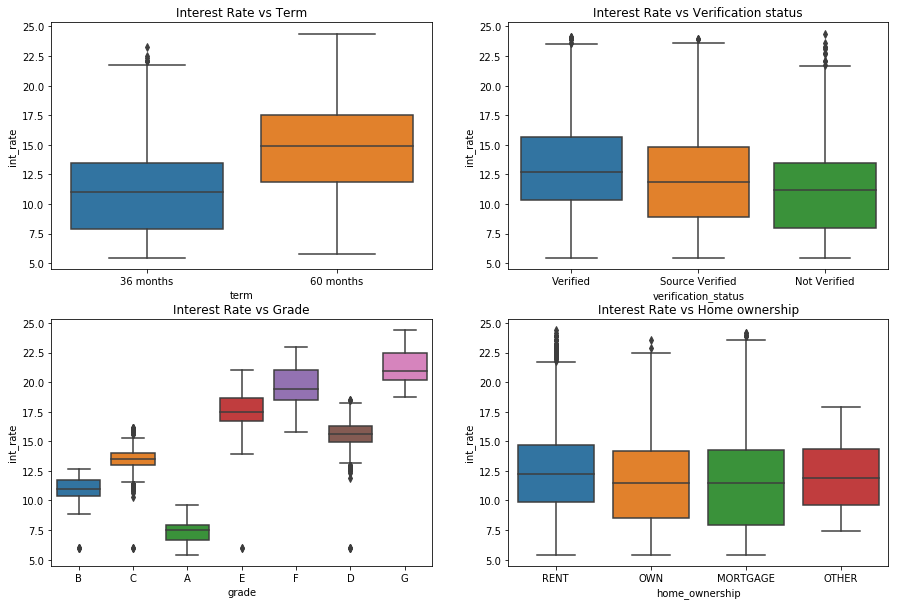

In [893]:
# We will use boxplot to understand the distribution with term,verification,grade,home_ownership


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=loan_df['term'],y = loan_df['int_rate'])
plt.title("Interest Rate vs Term")


plt.subplot(2,2,2)
sns.boxplot(x=loan_df['verification_status'],y = loan_df['int_rate'])
plt.title("Interest Rate vs Verification status")

plt.subplot(2,2,3)
sns.boxplot(x=loan_df['grade'],y = loan_df['int_rate'])
plt.title("Interest Rate vs Grade")

plt.subplot(2,2,4)
sns.boxplot(x=loan_df['home_ownership'],y = loan_df['int_rate'])
plt.title("Interest Rate vs Home ownership")

# plt.tight_layout()
plt.show()

Observations:
- Interest rate for 36 months is lesser than compared to 60 months.
- We see that Loan is provided to borrowers whose income has not been verified and its interest rate lies between 8% - 13%
- The interest rate for Grade= A,B,C are under 15% considering the risk and loan amount being less. For Grades = E,F,D,G have high interest rates.

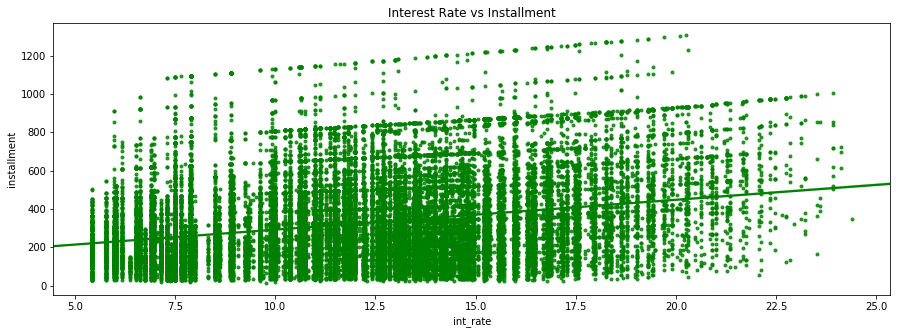

In [1176]:
# comapring installment and int_rate for any trends

plt.figure(figsize=(15,5))
sns.regplot(y=loan_df['installment'],x = loan_df['int_rate'],marker='.',color='green')
plt.title("Interest Rate vs Installment")
plt.show()

Observations:

- We see that there is slight uptrend when interest rate rises, the installment also increases.

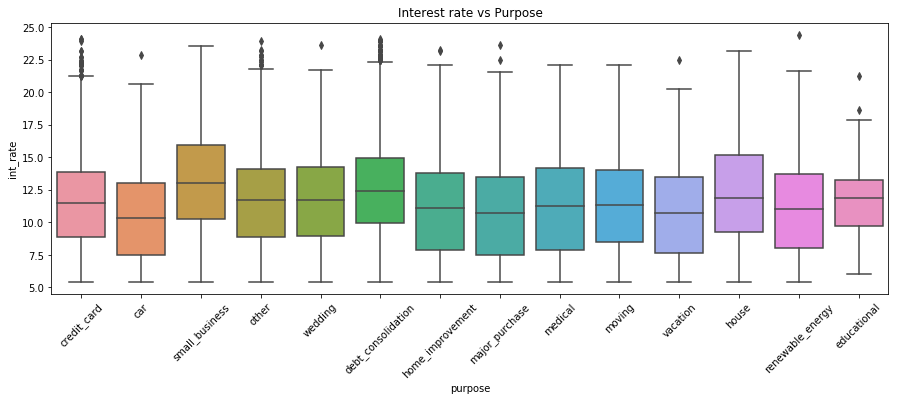

In [869]:
# understanding with Purpose

plt.figure(figsize=(15,5))
sns.boxplot(x=loan_df['purpose'],y = loan_df['int_rate'])
plt.xticks(rotation=45)
plt.title("Interest rate vs Purpose")

plt.show()

Observations:

- Higher interest rates can be seen for 'small_business' and then 'debt_consolidation'.

# DTI

In [884]:
# understanding stats

loan_df['dti'].describe()

count   37,880.00
mean        13.32
std          6.66
min          0.00
25%          8.19
50%         13.41
75%         18.59
max         29.99
Name: dti, dtype: float64

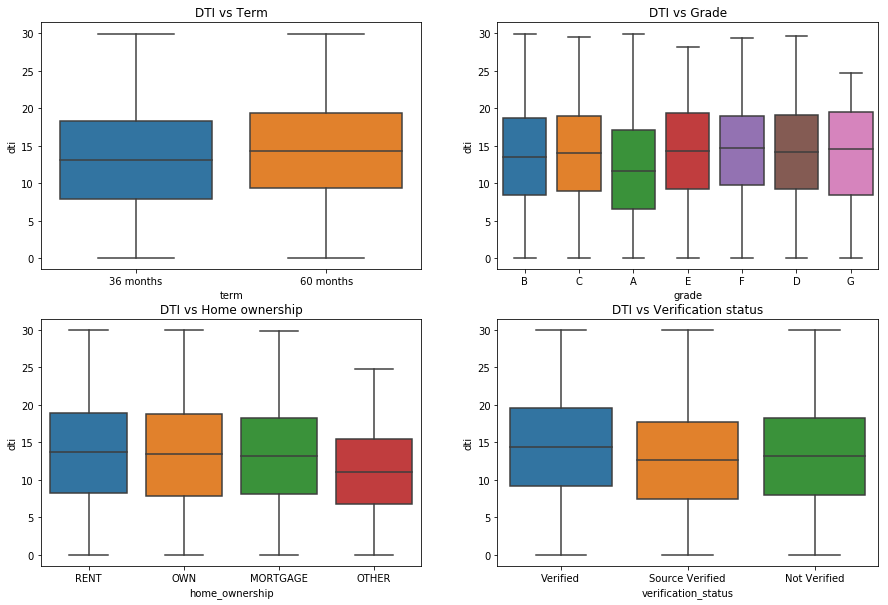

In [890]:
# We will use boxplot to understand the distribution with term,verification,grade,home_ownership

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=loan_df['term'],y = loan_df['dti'])
plt.title("DTI vs Term")

plt.subplot(2,2,2)
sns.boxplot(x=loan_df['grade'],y = loan_df['dti'])
plt.title("DTI vs Grade")

plt.subplot(2,2,3)
sns.boxplot(x=loan_df['home_ownership'],y = loan_df['dti'])
plt.title("DTI vs Home ownership")

plt.subplot(2,2,4)
sns.boxplot(x=loan_df['verification_status'],y = loan_df['dti'])
plt.title("DTI vs Verification status")

plt.show()

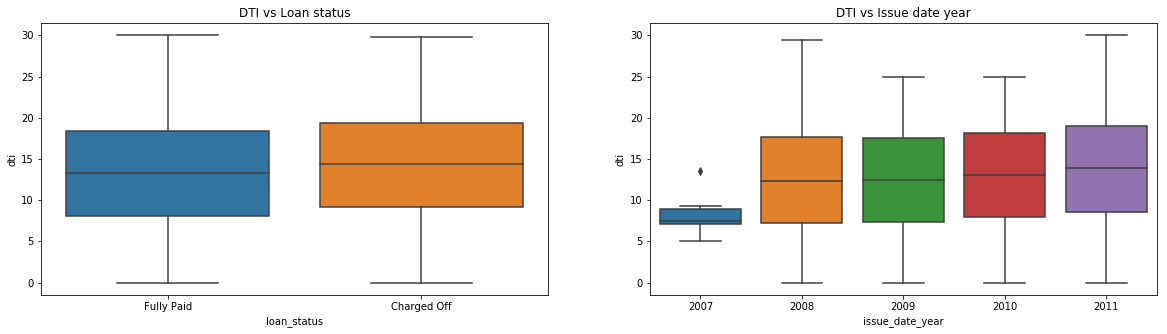

In [894]:
# checking with Loan_status and Issue year

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x=loan_df['loan_status'],y = loan_df['dti'])
plt.title("DTI vs Loan status")

plt.subplot(1,2,2)
sns.boxplot(x=loan_df['issue_date_year'],y = loan_df['dti'])
plt.title("DTI vs Issue date year")

plt.show()

Observation:
- We se that for all attributes DTI is quite stable and in range.
- There are no records where dti > 30.

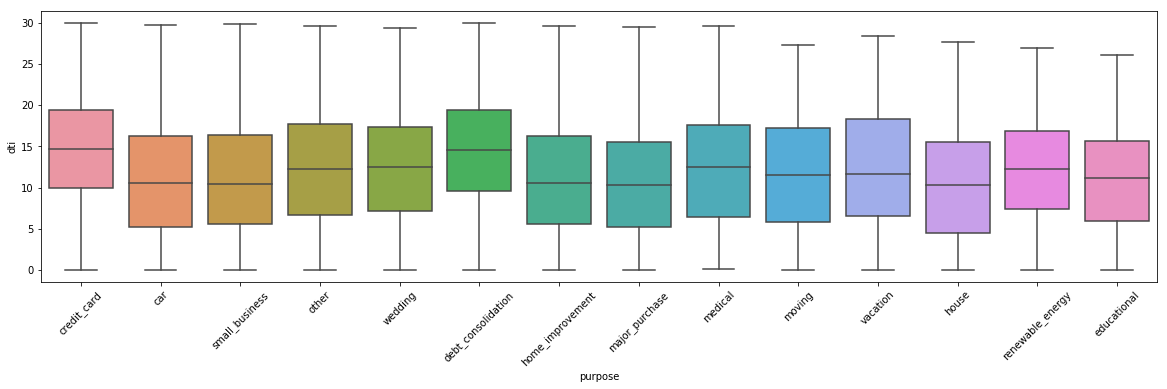

In [537]:
# lets check with Purpose

plt.figure(figsize=(20,5))
sns.boxplot(x=loan_df['purpose'],y = loan_df['dti'])
plt.xticks(rotation=45)
plt.title("DTI vs Purpose")
plt.show()

Observation:

- We see that DTI is slight higher when it comes to Credit card repayment purpose. Followed by debt_consolidation.

# pub_rec_bankruptcies

In [825]:
loan_df['pub_rec_bankruptcies'].value_counts(normalize=True)

0.00   0.96
1.00   0.04
2.00   0.00
Name: pub_rec_bankruptcies, dtype: float64

In [912]:
term_df = loan_df.groupby(['pub_rec_bankruptcies', 'term'], as_index=False)['id'].count()
term_df['ratio']= term_df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())
term_df.rename(columns={'id':'count'}, inplace=True)
term_df

,pub_rec_bankruptcies,term,count,ratio
0,0.00,36 months,27218,0.75
1,0.00,60 months,9020,0.25
2,1.00,36 months,1176,0.72
3,1.00,60 months,461,0.28
4,2.00,36 months,5,1.00


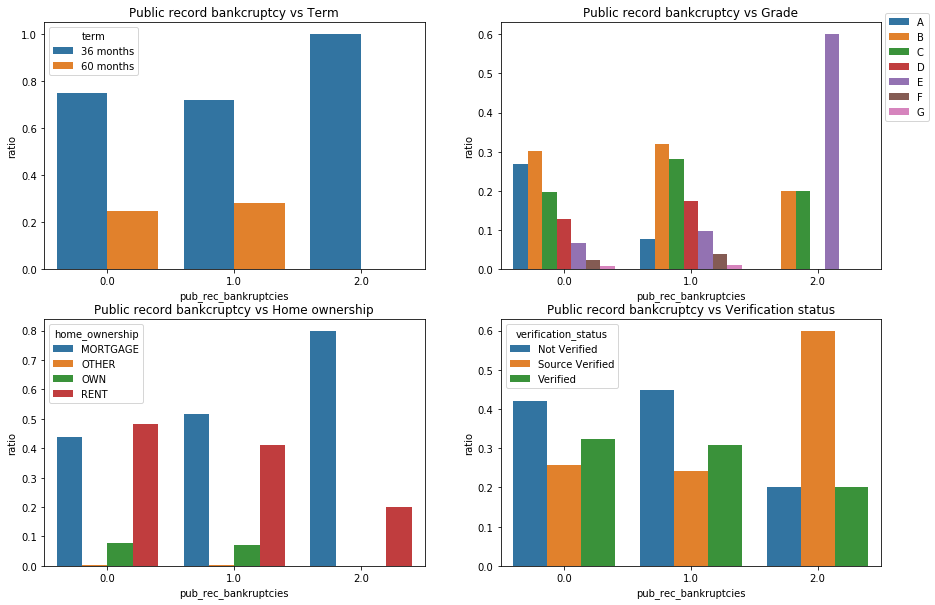

In [935]:
# We will use barplot to understand the distribution with term,verification,grade,home_ownership

term_df = loan_df.groupby(['pub_rec_bankruptcies', 'term'], as_index=False)['id'].count()
term_df['ratio']= term_df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())
term_df.rename(columns={'id':'count'}, inplace=True)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=term_df['pub_rec_bankruptcies'],y = term_df['ratio'], hue=term_df['term'])
plt.title("Public record bankcruptcy vs Term")


grade_df = loan_df.groupby(['pub_rec_bankruptcies', 'grade'], as_index=False)['id'].count()
grade_df['ratio']= grade_df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())
grade_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,2)
sns.barplot(x=grade_df['pub_rec_bankruptcies'],y = grade_df['ratio'], hue=grade_df['grade'])
plt.title("Public record bankcruptcy vs Grade")
plt.legend(loc=(1.01,0.6))


home_ownership_df = loan_df.groupby(['pub_rec_bankruptcies', 'home_ownership'], as_index=False)['id'].count()
home_ownership_df['ratio']= home_ownership_df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())
home_ownership_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,3)
sns.barplot(x=home_ownership_df['pub_rec_bankruptcies'],y = home_ownership_df['ratio'], hue=home_ownership_df['home_ownership'])
plt.title("Public record bankcruptcy vs Home ownership")


verification_status_df = loan_df.groupby(['pub_rec_bankruptcies', 'verification_status'], as_index=False)['id'].count()
verification_status_df['ratio']= verification_status_df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())
verification_status_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(2,2,4)
sns.barplot(x=verification_status_df['pub_rec_bankruptcies'],y = verification_status_df['ratio'], hue=verification_status_df['verification_status'])
plt.title("Public record bankcruptcy vs Verification status")

plt.show()

Observations:
- For 36 months term, the pub_rec_bankruptcies is higher than 60 months on percent basis.
- We see that Grade= B, stands higher for pub_rec_bankruptcies= 0,1. But where pub_rec_bankruptcies=2, Grade E stands at higher. This could be due to the high risk factor.
- In case of home ownership, we see that borrowers with MORTGAGE have higher percentage for pub_rec_bankruptcies=1,2. Whereas there is a opposite picture for RENT ie. lower percentage for pub_rec_bankruptcies=1,2.
- In case of verification status, 'Not verified' is higher for pub_rec_bankruptcies=0,1. But when pub_rec_bankruptcies=2, suprisingly 'Source verified' has higher percentage basis.

# BiVariate Analysis

# Annual income to Loan Status

For better understanding we will use data where annual income < 82000$

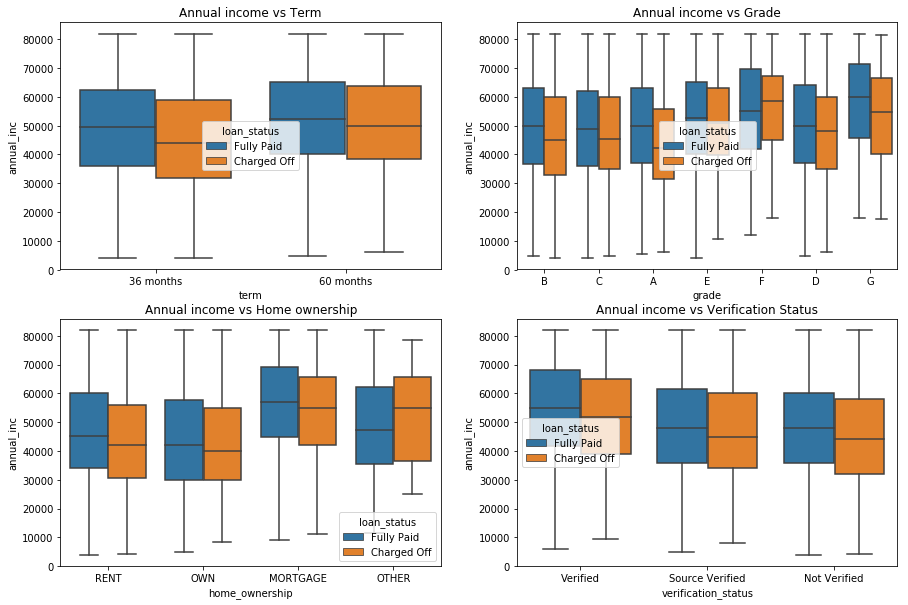

In [999]:
# We will use boxplot to understand 


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=loan_df_less_75['term'],y = loan_df_less_75['annual_inc'],hue = loan_df_less_75['loan_status'])
plt.title("Annual income vs Term")

plt.subplot(2,2,2)
sns.boxplot(x=loan_df_less_75['grade'],y = loan_df_less_75['annual_inc'],hue = loan_df_less_75['loan_status'])
plt.title("Annual income vs Grade")

plt.subplot(2,2,3)
sns.boxplot(x=loan_df_less_75['home_ownership'],y = loan_df_less_75['annual_inc'],hue = loan_df_less_75['loan_status'])
plt.title("Annual income vs Home ownership")

plt.subplot(2,2,4)
sns.boxplot(x=loan_df_less_75['verification_status'],y = loan_df_less_75['annual_inc'],hue = loan_df_less_75['loan_status'])
plt.title("Annual income vs Verification Status")

plt.show()

Observations:
- We see for Annual income wrt Term, the Charged Off is more for 60 months than 36 months.
- The Charged Off for grades = F and G are more. For Grade A, its the lowest
- The Charged Off is more when Home Ownership is Mortgage.
- To some suprise, the Charged Off is more when Income or Source is verified compared to Not verified.

# term to loan status

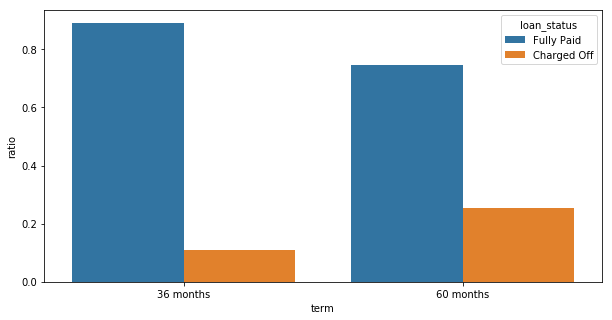

In [1055]:
# We will use barchart to understand 


plt.figure(figsize=(10,5))

# calculating the group wise percentage ratios

term_df = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
term_df['ratio'] = term_df.groupby('term').transform(lambda x: x/x.sum())
term_df.rename(columns={'id':'count'}, inplace=True)
sns.barplot(x=term_df['term'], y=term_df['ratio'], hue=term_df['loan_status'],hue_order=['Fully Paid','Charged Off'])


plt.show()

Observations:
- We see that when term is 60 months the Charged Off is increased. This could be due to term length in year being more for repayment adn higher interest rates.

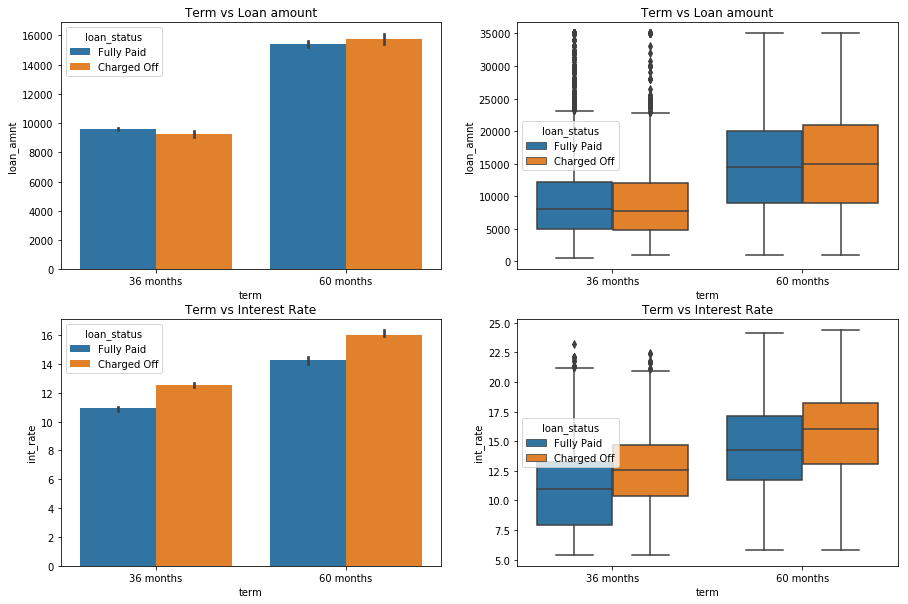

In [1018]:

# We will use barchart to understand 


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=loan_df['term'],y=loan_df['loan_amnt'],hue = loan_df['loan_status'])
plt.title("Term vs Loan amount")

plt.subplot(2,2,2)
sns.boxplot(x=loan_df['term'],y=loan_df['loan_amnt'],hue = loan_df['loan_status'])
plt.title("Term vs Loan amount")

plt.subplot(2,2,3)
sns.barplot(x=loan_df['term'],y=loan_df['int_rate'],hue = loan_df['loan_status'],estimator=np.median)
plt.title("Term vs Interest Rate")

plt.subplot(2,2,4)
sns.boxplot(y=loan_df['int_rate'],x = loan_df['term'],hue = loan_df['loan_status'])
plt.title("Term vs Interest Rate")

plt.show()

Observations:
- We see that loan amount for 60 months is more than 36 months. 
- We see that interest rate for 60 months is more than 36 months. In both situations, the Charged Off is more.
- Maybe due to high interest rate and longer term, it may be difficult for borrower to repay the hefty installment.

## Installment and term to loan status

Max Installment for Full Paid:  1295.21
Max Installment for Charged Off :  1305.19 

Min Installment for Charged Off :  22.79
Min Installment for Full Paid:  16.08 

Median Installment for Full Paid :  275.76
Median Installment for Charged Off :  291.76


Text(0.5, 1.0, 'Term vs Installment')

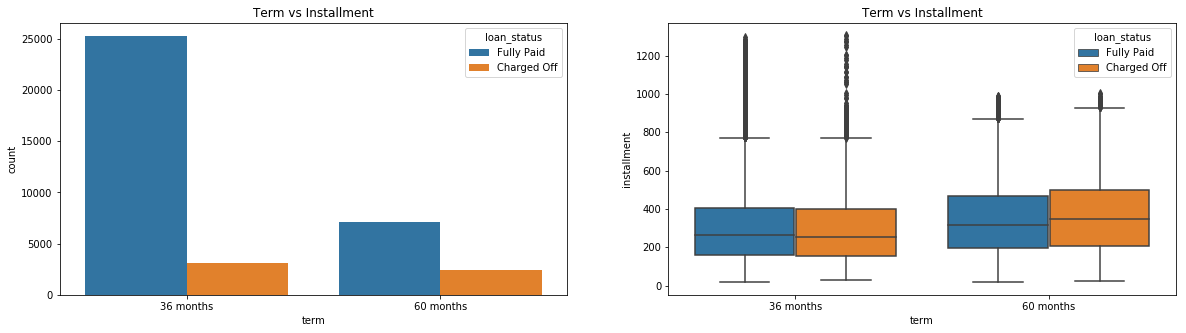

In [1039]:
#loan status amd installment
# we can find max, min, median installments for each loan_status

print("Max Installment for Full Paid: ",loan_df[(loan_df['loan_status']=='Fully Paid')]['installment'].max())
print("Max Installment for Charged Off : ",loan_df[(loan_df['loan_status']=='Charged Off')]['installment'].max(),"\n")
print("Min Installment for Charged Off : ",loan_df[(loan_df['loan_status']=='Charged Off')]['installment'].min())
print("Min Installment for Full Paid: ",loan_df[(loan_df['loan_status']=='Fully Paid')]['installment'].min(),"\n")
print("Median Installment for Full Paid : ",np.median(loan_df[(loan_df['loan_status']=='Fully Paid')]['installment']))
print("Median Installment for Charged Off : ",np.median(loan_df[(loan_df['loan_status']=='Charged Off')]['installment']))


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=loan_df['term'],y=loan_df['installment'],hue = loan_df['loan_status'],estimator=np.median)
plt.title("Term vs Installment")

plt.subplot(1,2,2)
# sns.boxplot(x = loan_df['term'],y=loan_df['purpose'],hue = loan_df['loan_status'])
sns.boxplot(x=loan_df['term'],y=loan_df['installment'],hue = loan_df['loan_status'])
plt.title("Term vs Installment")

Observations-

- We see that max,min and median values are higher for 'Charged Off' loan status. 
- It is quite evident that higher installment value leads to 'Charged Off' loans. This is same inferred from high interest rates.



# Grade to loan status

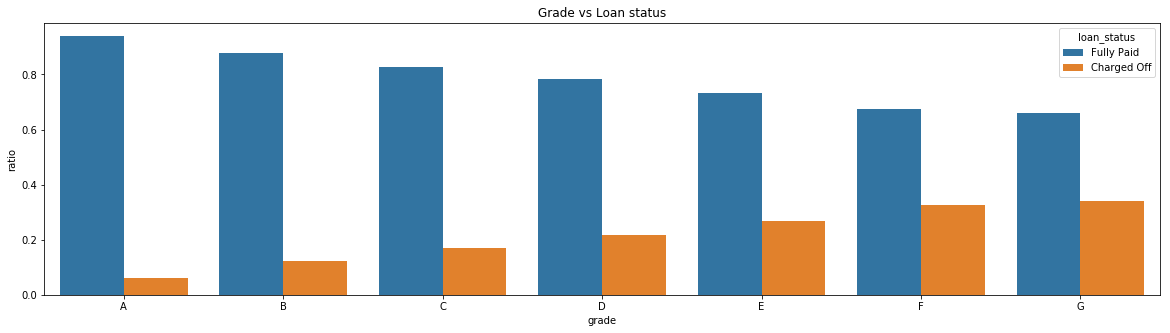

In [1241]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

# calculating the group wise percentage ratios
grade_df = loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
grade_df['ratio'] = grade_df.groupby('grade').transform(lambda x: x/x.sum())
grade_df.rename(columns={'id':'count'}, inplace=True)
sns.barplot(x=grade_df['grade'], y=grade_df['ratio'], hue=grade_df['loan_status'],hue_order=['Fully Paid','Charged Off'])

plt.title("Grade vs Loan status")
plt.show()

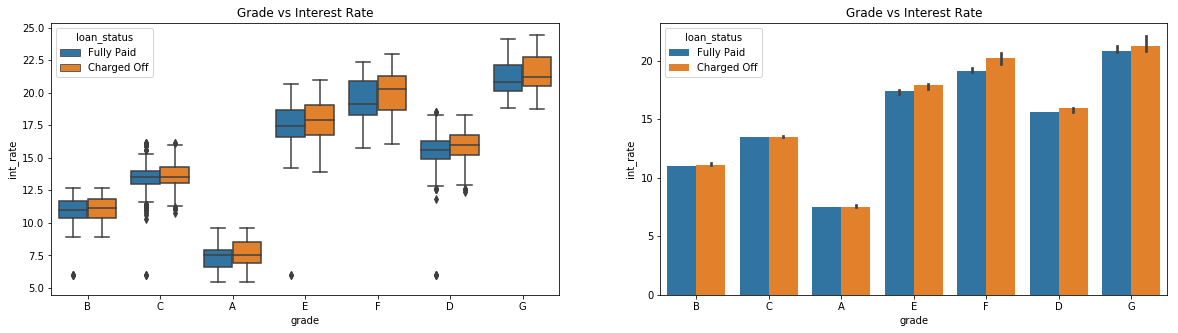

In [1076]:
# We will use boxplot to understand

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Grade vs Interest Rate')
plt.subplot(1,2,2)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

Observations:
- We see that for Grade= A,B,C the int_rates are lower than 15%, but Charged Off is more than Full paid for each of grade.
- For Grades=D,E,F,G, the interest rates are above 15%. The Charged Off spread increases as Grade increases.
- This tells that as Grade increase there are more chances for Charged Off.(Higher int_rates and then failing to repay)

# Purpose to loan status

In [1049]:
# understanding and grouping with loan_status
loan_df.groupby(['purpose','loan_status']).count()['id'].head()

purpose             loan_status
car                 Charged Off     157
                    Fully Paid     1325
credit_card         Charged Off     534
                    Fully Paid     4395
debt_consolidation  Charged Off    2716
Name: id, dtype: int64

In [509]:
# Further we can calculate and illustrate the ratio for total loan count to 'Charged Off','Fully Paid'

for i in range(0,14):
    chargedoff_count = loan_df[loan_df['loan_status']=='Charged Off'].sort_values('purpose').groupby('purpose').count()['id'][i]
    t_count = loan_df.groupby('purpose').count().reset_index().sort_values('purpose')['id'][i]
    charged_off_ratio = round(100*(chargedoff_count/t_count),2)
    print("Charged off ratio = ",loan_df.groupby('purpose').count().reset_index().sort_values('purpose')['purpose'][i],'->',charged_off_ratio)

Charged off ratio =  car -> 10.67
Charged off ratio =  credit_card -> 10.78
Charged off ratio =  debt_consolidation -> 15.33
Charged off ratio =  educational -> 17.23
Charged off ratio =  home_improvement -> 12.07
Charged off ratio =  house -> 16.08
Charged off ratio =  major_purchase -> 10.33
Charged off ratio =  medical -> 15.57
Charged off ratio =  moving -> 15.97
Charged off ratio =  other -> 16.39
Charged off ratio =  renewable_energy -> 18.63
Charged off ratio =  small_business -> 27.08
Charged off ratio =  vacation -> 14.13
Charged off ratio =  wedding -> 10.37


In [510]:
for i in range(0,14):
    paid_count = loan_df[loan_df['loan_status']=='Fully Paid'].sort_values('purpose').groupby('purpose').count()['id'][i]
    t_count = loan_df.groupby('purpose').count().reset_index().sort_values('purpose')['id'][i]
    paid_off_ratio = round(100*(paid_count/t_count),2)
    print("Fully paid ratio = ",loan_df.groupby('purpose').count().reset_index().sort_values('purpose')['purpose'][i],'->',paid_off_ratio)

Fully paid ratio =  car -> 89.33
Fully paid ratio =  credit_card -> 89.22
Fully paid ratio =  debt_consolidation -> 84.67
Fully paid ratio =  educational -> 82.77
Fully paid ratio =  home_improvement -> 87.93
Fully paid ratio =  house -> 83.92
Fully paid ratio =  major_purchase -> 89.67
Fully paid ratio =  medical -> 84.43
Fully paid ratio =  moving -> 84.03
Fully paid ratio =  other -> 83.61
Fully paid ratio =  renewable_energy -> 81.37
Fully paid ratio =  small_business -> 72.92
Fully paid ratio =  vacation -> 85.87
Fully paid ratio =  wedding -> 89.63


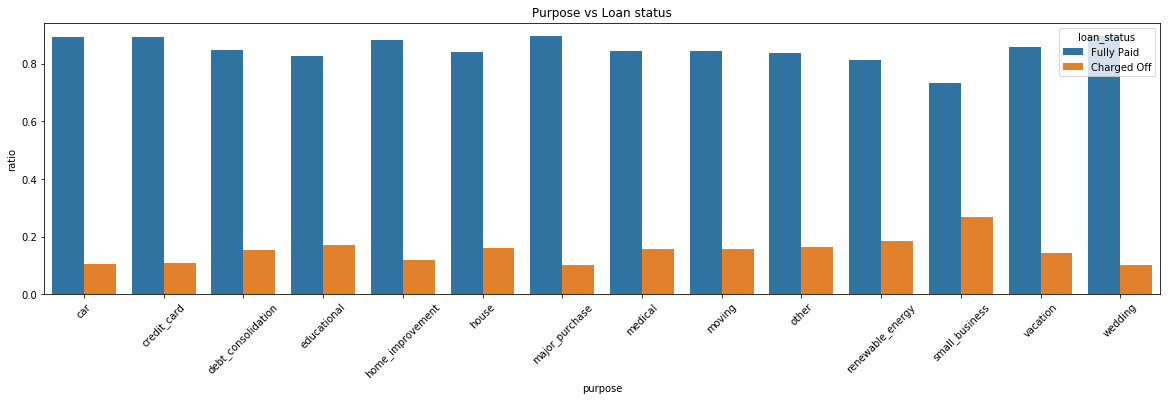

In [1242]:
# BIVARIATE ANLAYSIS part
# We can groupby data with respect to loan_status and purpose
# 'Charged Off','Fully Paid' only


plt.figure(figsize=(20,5))

# calculating the group wise percentage ratios
purpose_df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
purpose_df['ratio'] = purpose_df.groupby('purpose').transform(lambda x: x/x.sum())
purpose_df.rename(columns={'id':'count'}, inplace=True)
sns.barplot(x=purpose_df['purpose'], y=purpose_df['ratio'], hue=purpose_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.xticks(rotation=45)

plt.title("Purpose vs Loan status")

plt.show()

Observations:
- We see that loan purpose = 'small_business' and 'renewable_energy' have higher ratio of being 'Charged Off'
- Even though the loan applied for 'debt_consolidation' purpose has higher counts, still it has lower ratio for being 'Charged Off'
- This could state more possibility for mentioned purpose ['small_business','renewable_energy'] would be 'Charged Off' than other purpose.
- 'purpose' column can help to indicate the possibilty of loan approval/rejection

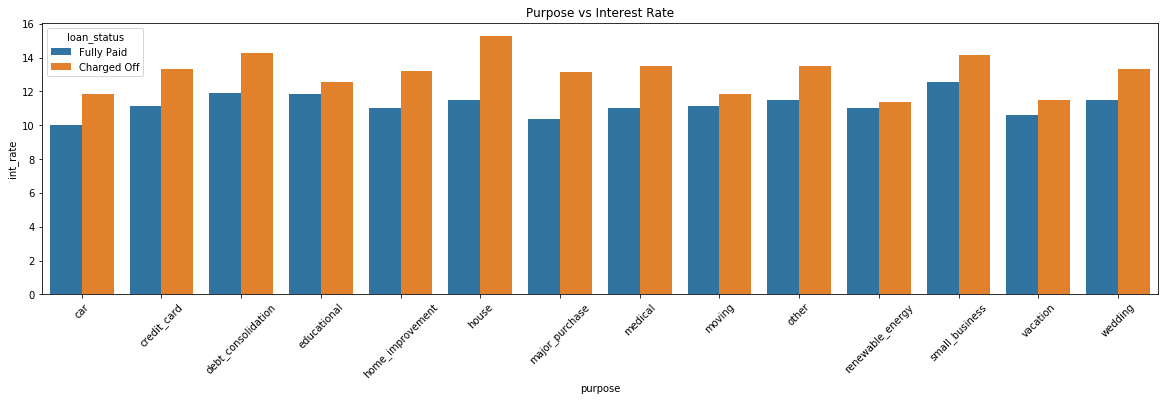

In [1243]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

purpose_df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
sns.barplot(x=purpose_df['purpose'], y=purpose_df['int_rate'], hue=purpose_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.xticks(rotation=45)

plt.title("Purpose vs Interest Rate")

plt.show()

Observations:
- We see that on an median the int_rates for Fully Paid lies under 12%. But incase of Charged Off, they are above 12%.
- Most high interest_rates are for house,debt_consolidation and small_business.
- Most high Charged Off difference is for house,major_purchase.

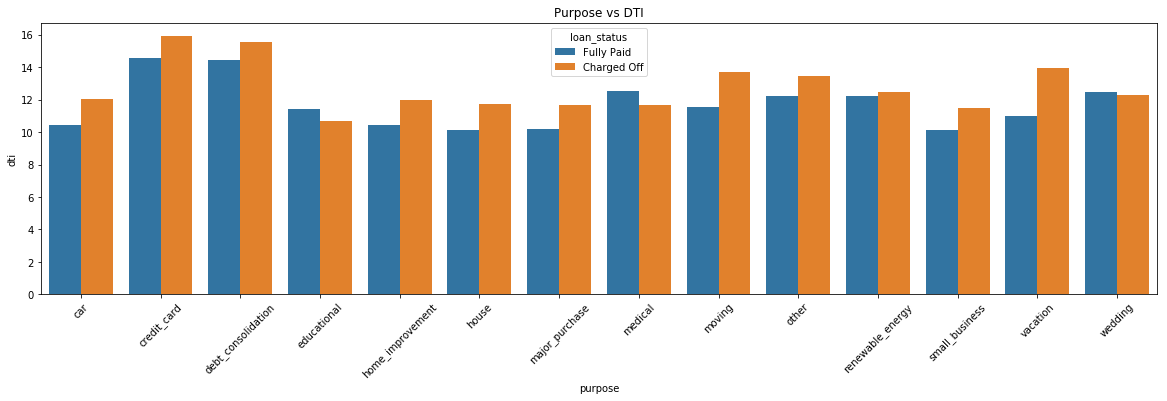

In [1245]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

purpose_df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
sns.barplot(x=purpose_df['purpose'], y=purpose_df['dti'], hue=purpose_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.xticks(rotation=45)

plt.title("Purpose vs DTI")

plt.show()

Observations:
- We see that on an median the DTI for Fully Paid works positively for educational and medical.

# DTI vs verification status and Home ownership


In [1247]:
# grouping data with median values of DTI

ver_df = loan_df.groupby(['verification_status','loan_status'],as_index=False)['dti'].median()
home_df = loan_df.groupby(['loan_status','home_ownership'],as_index=False)['dti'].median()

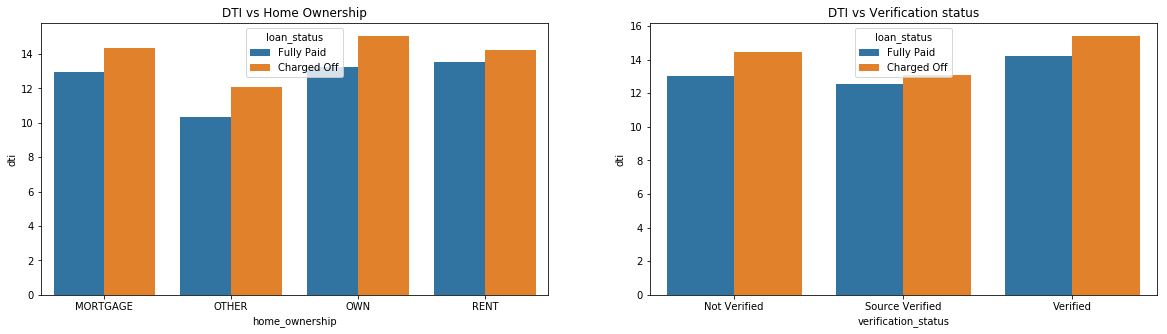

In [1248]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=home_df['home_ownership'], y=home_df['dti'], hue=home_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("DTI vs Home Ownership")

plt.subplot(1,2,2)
sns.barplot(x=ver_df['verification_status'], y=ver_df['dti'], hue=ver_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("DTI vs Verification status")

plt.show()

Observation:
- We see that for all categories of Verification Status and Home ownership the 'Charged Off' count is high. 
- It means that Verification status is not proper parameter with DTI. Even though we verify the income, still the Charged Off counts are more.
- If the DTI is higher and the home ownership is 'own', then the percentage of Charged Off loan is higher.
- The Lending club must work more on background scrutiny checks.

# Interest rate vs verification status and Home ownership

In [1249]:
# grouping data with median values of int_rates

ver_df = loan_df.groupby(['verification_status','loan_status'],as_index=False)['int_rate'].median()
home_df = loan_df.groupby(['home_ownership','loan_status'],as_index=False)['int_rate'].median()

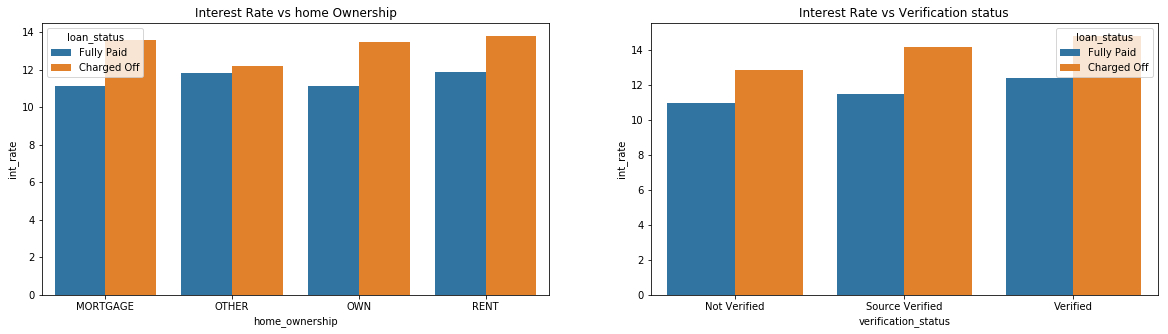

In [1250]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=home_df['home_ownership'], y=home_df['int_rate'], hue=home_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Interest Rate vs home Ownership")


plt.subplot(1,2,2)
sns.barplot(x=ver_df['verification_status'], y=ver_df['int_rate'], hue=ver_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Interest Rate vs Verification status")

plt.show()

Observation:
- We see that for all categories of Verification Status and Home ownership the 'Charged Off' count is high. 
- The charts resembles same as DTI

 # Interest rate vs issue year and issue month

In [1255]:
# grouping data with median values of int_rates

year_df = loan_df.groupby(['issue_date_year','loan_status'],as_index=False)['int_rate'].median()
year_df.rename(columns={'id':'count'}, inplace=True)

month_df = loan_df.groupby(['issue_date_month','loan_status'],as_index=False)['int_rate'].median()
month_df.rename(columns={'id':'count'}, inplace=True)

In [1119]:
year_df

,issue_date_year,loan_status,int_rate
0,2007,Charged Off,11.86
1,2007,Fully Paid,10.59
2,2008,Charged Off,11.66
3,2008,Fully Paid,11.14
4,2009,Charged Off,13.16
5,2009,Fully Paid,12.21
6,2010,Charged Off,13.61
7,2010,Fully Paid,11.36
8,2011,Charged Off,14.27
9,2011,Fully Paid,11.11


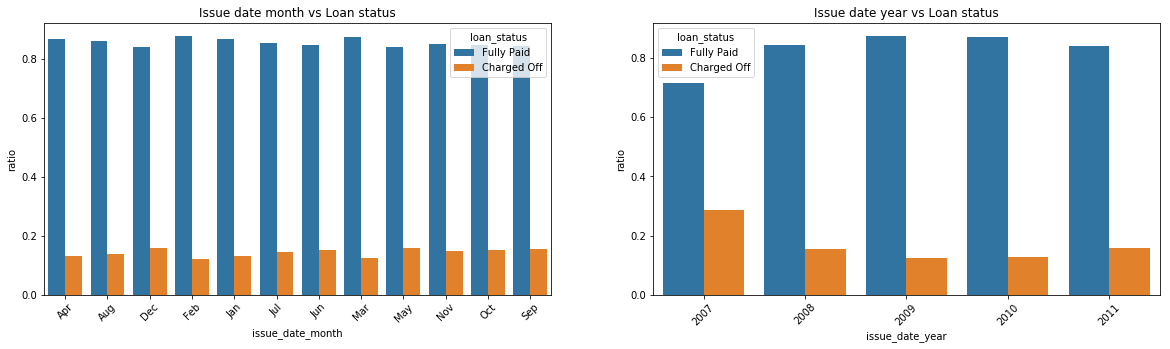

In [1253]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

# calculating the group wise percentage ratios
month_df = loan_df.groupby(['issue_date_month','loan_status'],as_index=False)['id'].count()
month_df['ratio'] = month_df.groupby('issue_date_month').transform(lambda x: x/x.sum())
month_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(1,2,1)
sns.barplot(x=month_df['issue_date_month'], y=month_df['ratio'], hue=month_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.xticks(rotation=45)
plt.title("Issue date month vs Loan status")


# calculating the group wise percentage ratios
year_df = loan_df.groupby(['issue_date_year','loan_status'],as_index=False)['id'].count()
year_df['ratio'] = year_df.groupby('issue_date_year').transform(lambda x: x/x.sum())
year_df.rename(columns={'id':'count'}, inplace=True)

plt.subplot(1,2,2)
sns.barplot(x=year_df['issue_date_year'], y=year_df['ratio'], hue=year_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.xticks(rotation=45)
plt.title("Issue date year vs Loan status")

plt.show()



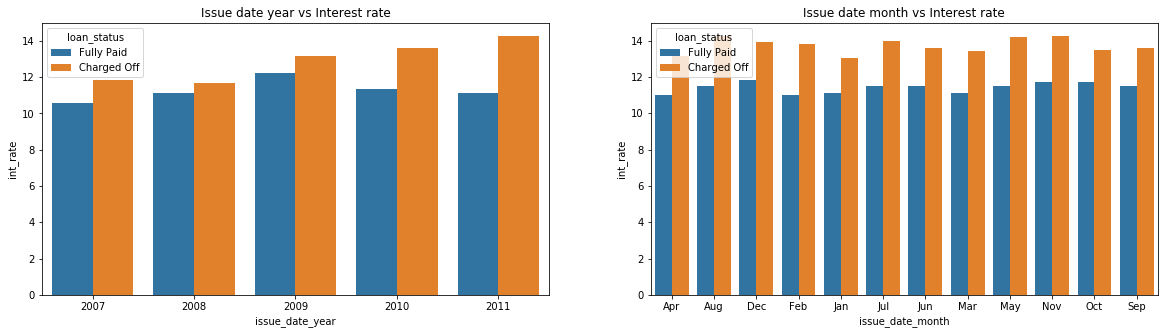

In [1256]:
# We will use barchart to understand 

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=year_df['issue_date_year'], y=year_df['int_rate'], hue=year_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Issue date year vs Interest rate")


plt.subplot(1,2,2)
sns.barplot(x=month_df['issue_date_month'], y=month_df['int_rate'], hue=month_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Issue date month vs Interest rate")

plt.show()

Observations:
- We see that most loans are Full Paid wrt Year and Month.
- But when Interest rate comes into picture:
    - We see that since 2007 till 2011, as interest rate rose up the Charged Off count rose too.
    - The difference between Charged Off and Fully Paid was minimal (Charged Off leading) till 2009. Then for 2010 and 2011, the difference came out big.
    - For monthly basis, it is clear evident that as interest rate are high, more chances of getting Charged Off.


# addr_state vs int_rate and dti

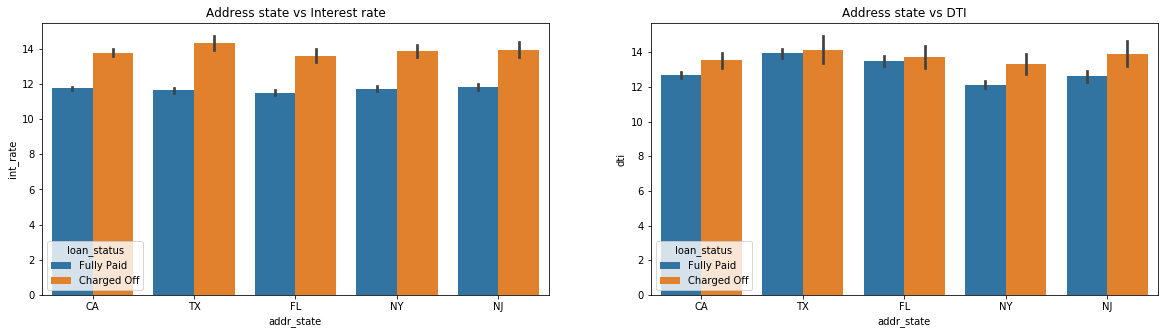

In [1257]:
# Since there are multiple states, we will use top 5 states to analyse based on counts (top5_df)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=top5_df['addr_state'], y=top5_df['int_rate'], hue=top5_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Address state vs Interest rate")



plt.subplot(1,2,2)
sns.barplot(x=top5_df['addr_state'], y=top5_df['dti'], hue=top5_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Address state vs DTI")

plt.show()

Observations:
- We see that interest rate is greater than 12%, most loans turn Charged Off.
- We see that using DTI, the Charged Off ratio is more for NY and NJ. 

# loan status to employment_length - interest rate and dti


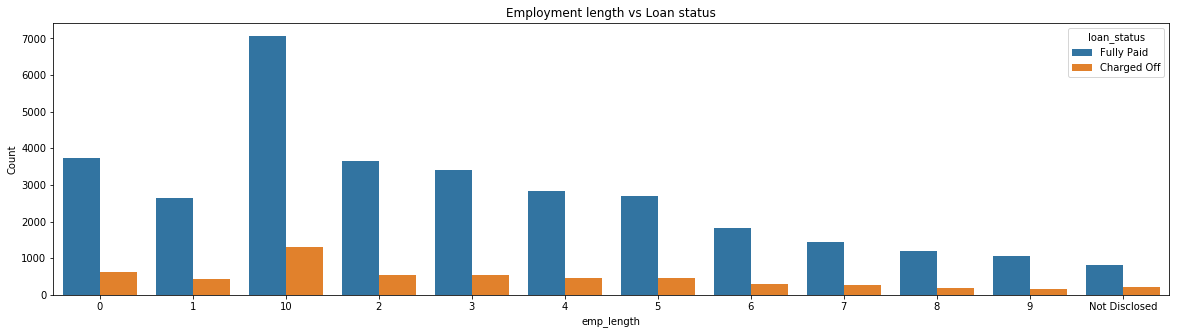

In [1258]:
# grouping data with count
emp_df = loan_df.groupby(['emp_length','loan_status'],as_index=False)['id'].count()
plt.figure(figsize=(20,5))
sns.barplot(x=emp_df['emp_length'], y=emp_df['id'], hue=emp_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.title("Employment length vs Loan status")
plt.ylabel("Count")
plt.show()

Observations:
- We see that borrowers who have employment years =>10, have highest loan borrowers.

In [1260]:
# grouping data with median values of 'int_rate','dti','installment','loan_amnt'

emp_df = loan_df.groupby(['emp_length','loan_status'],as_index=False)[['int_rate','dti','installment','loan_amnt']].median()


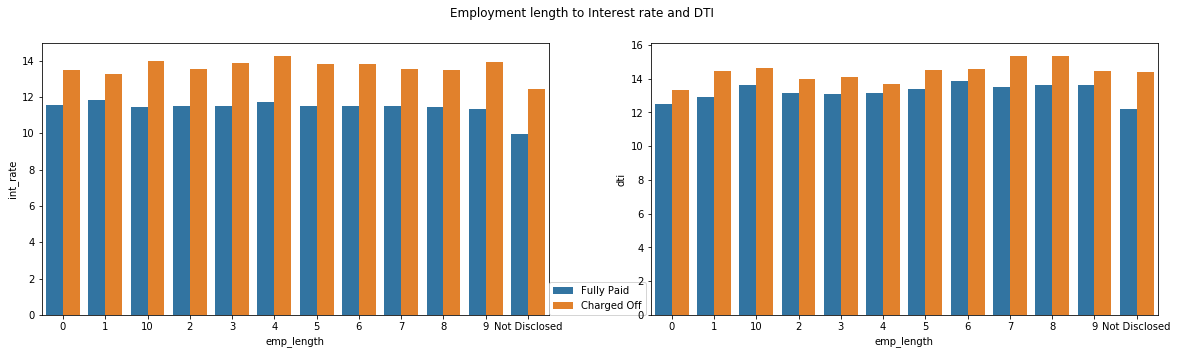

In [1262]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=emp_df['emp_length'], y=emp_df['int_rate'], hue=emp_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.legend(loc=(1,0))

plt.subplot(1,2,2)
sns.barplot(x=emp_df['emp_length'], y=emp_df['dti'], hue=emp_df['loan_status'],hue_order=['Fully Paid','Charged Off'])

plt.suptitle("Employment length to Interest rate and DTI")

plt.legend().remove()

Observations:
- we see that for higher interest rates and higher dti, there are chances that the borrowers might go Charged Off.

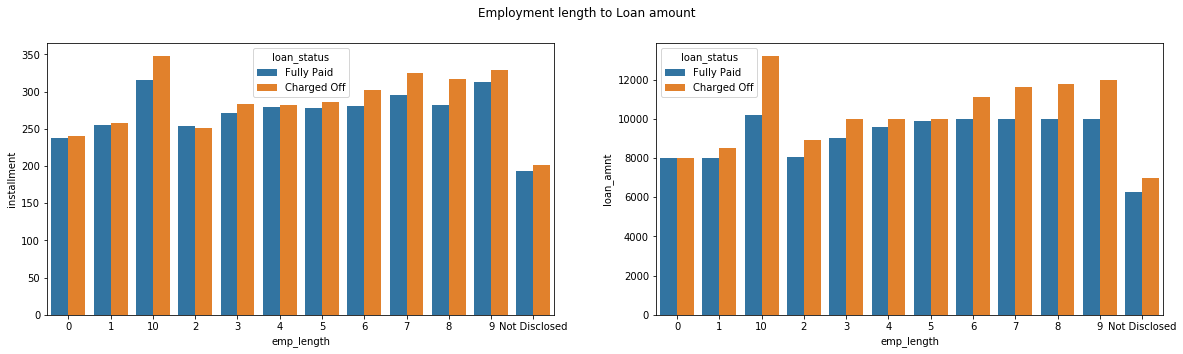

In [1263]:
plt.figure(figsize=(20,5))


plt.subplot(1,2,1)
sns.barplot(x=emp_df['emp_length'], y=emp_df['installment'], hue=emp_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.suptitle("Employment length to Installment")

plt.subplot(1,2,2)
sns.barplot(x=emp_df['emp_length'], y=emp_df['loan_amnt'], hue=emp_df['loan_status'],hue_order=['Fully Paid','Charged Off'])
plt.suptitle("Employment length to Loan amount")

plt.show()

Observations:
- When compared with installments, there some are emp_length where they are neutral wrt loan status. Once the installment crosses 260 on median mark, the chances of Charged Off increases.
- For loan_amount, borrowers with emp_length= 6,7,8,9,10 have most difference of Charged Off ratios (alomg applied for higher loan amount ie. more than 12,000$ on median)

# installments vs term vs int_rate for loan status

In [1230]:
term_df = loan_df.groupby(['term','loan_status'],as_index=False)[['installment','int_rate','dti']].median()
term_df

,term,loan_status,installment,int_rate,dti
0,36 months,Charged Off,254.48,12.53,14.00
1,36 months,Fully Paid,262.18,10.95,12.93
2,60 months,Charged Off,345.59,15.99,14.83
3,60 months,Fully Paid,317.04,14.27,14.22


Observations:
- we see that for Charged Off, the int_rates on median are higher than Full Paid. Both valid for 36 months and 60 months.
- Even though DTI stays stable or irrespective of DTI, if interest rates are high then Charged off loans are high.